In [ ]:
import numpy as np
import pandas as pd
import json
import datetime

import re
import nltk
from nltk.corpus import stopwords

from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [ ]:

df = pd.read_csv("/content/drive/MyDrive/US_youtube_trending_data.csv")


df.head()

video_id                                              title  \
0  3C66w5Z0ixs                 I ASKED HER TO BE MY GIRLFRIEND...   
1  M9Pmf9AB4Mo  Apex Legends | Stories from the Outlands – “Th...   
2  J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   
3  kXLn3HkpjaA  XXL 2020 Freshman Class Revealed - Official An...   
4  VIUo6yapDbc  Ultimate DIY Home Movie Theater for The LaBran...   

            publishedAt                 channelId   channelTitle  categoryId  \
0  2020-08-11T19:20:14Z  UCvtRTOMP2TqYqu51xNrqAzg       Brawadis          22   
1  2020-08-11T17:00:10Z  UC0ZV6M2THA81QT9hrVWJG3A   Apex Legends          20   
2  2020-08-11T16:34:06Z  UCYzPXprvl5Y-Sf0g4vX-m6g  jacksepticeye          24   
3  2020-08-11T16:38:55Z  UCbg_UMjlHJg_19SZckaKajg            XXL          10   
4  2020-08-11T15:10:05Z  UCDVPcEbVLQgLZX0Rt6jo34A       Mr. Kate          26   

          trending_date                                               tags  \
0  2020-08-12T00:00:00Z  brawadis|prank|basketball|skits|ghost|funny vi...   
1  2020-08-12T00:00:00Z  Apex Legends|Apex Legends characters|new Apex ...   
2  2020-08-12T00:00:00Z  jacksepticeye|funny|funny meme|memes|jacksepti...   
3  2020-08-12T00:00:00Z  xxl freshman|xxl freshmen|2020 xxl freshman|20...   
4  2020-08-12T00:00:00Z  The LaBrant Family|DIY|Interior Design|Makeove...   

   view_count   likes  dislikes  comment_count  \
0     1514614  156908      5855          35313   
1     2381688  146739      2794          16549   
2     2038853  353787      2628          40221   
3      496771   23251      1856           7647   
4     1123889   45802       964           2196   

                                   thumbnail_link  comments_disabled  \
0  https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg              False   
1  https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg              False   
2  https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg              False   
3  https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg              False   
4  https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg              False   

   ratings_disabled                                        description  
0             False  SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...  
1             False  While running her own modding shop, Ramya Pare...  
2             False  I left youtube for a month and this is what ha...  
3             False  Subscribe to XXL → http://bit.ly/subscribe-xxl...  
4             False  Transforming The LaBrant Family's empty white ...

Variables Analysis¶

There are 16 colums in the US dataset:

"video_id,title, title,publishedAt, channelId, channelTitle, categoryId, trending_date, tags,view_count, likes,dislikes, comment_count, thumbnail_link, comments_disabled, ratings_disabled, description"

Lets observe the variables that we might need

**video_id**: Have alphabets and numbers. But we wont be neading it for analysis but it can be used as a prove that the video really exists and we didn't just randomly add any data.

**trending_date**: Have the date when the video started trending.

**title**: Title represents the whole video or we can say what the video is about but sometimes youtubers tend to add catchy or falsy words so that viewers click on the video in the motive of geting views.

**channel_title**: Chanel name nothing much can be used to differentiate content creators.

**category_id**: YouTube gives every video a catagory id based on the video or the chanel owner can set a catagory so that viewers can find the video faster using the filter options.

**publishedAt**: When the video was actually published can be helpfull to know when the event started happning.

**tags**: Tags are famous ways to connect videos in worldwide known words we can also say that these are unoffical catagorys commonly known by people/viewers.
views,likes,dislikes,comment_count: Has numerical values it represents the ingagements of the video.

**thumbnail_link**: have the url for the picture of the thumbnail. Oddly now adding exotic pics to thumbnails can bring more views. We can analys the pics but that topic is more advanced so we will not be doing that.

**comments_disabled,ratings_disabled,video_error_or_removed**: Have bool values we think about it later if needed.
description: Have description as string. Might contain emoji ar ascii values, we have to remove them if we use them for anylysis.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268787 entries, 0 to 268786
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           268787 non-null  object
 1   title              268787 non-null  object
 2   publishedAt        268787 non-null  object
 3   channelId          268787 non-null  object
 4   channelTitle       268787 non-null  object
 5   categoryId         268787 non-null  int64 
 6   trending_date      268787 non-null  object
 7   tags               268787 non-null  object
 8   view_count         268787 non-null  int64 
 9   likes              268787 non-null  int64 
 10  dislikes           268787 non-null  int64 
 11  comment_count      268787 non-null  int64 
 12  thumbnail_link     268787 non-null  object
 13  comments_disabled  268787 non-null  bool  
 14  ratings_disabled   268787 non-null  bool  
 15  description        264238 non-null  object
dtypes: bool(2), int64(5)

In [ ]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()

# Print the number of null values in each column
print(null_values)


video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          4549
dtype: int64


In [ ]:
df.drop(columns=['video_id','thumbnail_link','description'],inplace=True, errors='ignore')

df.head(n=2)

title           publishedAt  \
0                 I ASKED HER TO BE MY GIRLFRIEND...  2020-08-11T19:20:14Z   
1  Apex Legends | Stories from the Outlands – “Th...  2020-08-11T17:00:10Z   

                  channelId  channelTitle  categoryId         trending_date  \
0  UCvtRTOMP2TqYqu51xNrqAzg      Brawadis          22  2020-08-12T00:00:00Z   
1  UC0ZV6M2THA81QT9hrVWJG3A  Apex Legends          20  2020-08-12T00:00:00Z   

                                                tags  view_count   likes  \
0  brawadis|prank|basketball|skits|ghost|funny vi...     1514614  156908   
1  Apex Legends|Apex Legends characters|new Apex ...     2381688  146739   

   dislikes  comment_count  comments_disabled  ratings_disabled  
0      5855          35313              False             False  
1      2794          16549              False             False

Category ID Mapping

Currently, the category_id column contains the category id of each video, which is in the form of a number. We will replace the **category id** with the corresponding category title, as provided to us from in a json file from the original Kaggle dataset. To do this, we will create the dictionary** categoryID**, which will contain each category's information (i.e. kind, etag, id, title, etc.) We are only interested in the id and title, so we will create a separate dictionary called** ID_to_Category which will just contain the id's as keys and the corresponding titles.

In [ ]:
with open("/content/drive/MyDrive/US_category_id.json") as f: categoryID = json.load(f)
categoryID, l_c = categoryID['items'], len(categoryID['items'])
ID_to_Category = dict(zip([int(categoryID[i]['id']) for i in range(l_c)],
                          [categoryID[i]['snippet']['title'] for i in range(l_c)]))

In [ ]:
ID_to_Category

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [ ]:
df.head(n=2)

title           publishedAt  \
0                 I ASKED HER TO BE MY GIRLFRIEND...  2020-08-11T19:20:14Z   
1  Apex Legends | Stories from the Outlands – “Th...  2020-08-11T17:00:10Z   

                  channelId  channelTitle  categoryId         trending_date  \
0  UCvtRTOMP2TqYqu51xNrqAzg      Brawadis          22  2020-08-12T00:00:00Z   
1  UC0ZV6M2THA81QT9hrVWJG3A  Apex Legends          20  2020-08-12T00:00:00Z   

                                                tags  view_count   likes  \
0  brawadis|prank|basketball|skits|ghost|funny vi...     1514614  156908   
1  Apex Legends|Apex Legends characters|new Apex ...     2381688  146739   

   dislikes  comment_count  comments_disabled  ratings_disabled  
0      5855          35313              False             False  
1      2794          16549              False             False

In [ ]:
df['categoryId'] = df['categoryId'].apply(lambda x: ID_to_Category[x])

df.head(n=2)

title           publishedAt  \
0                 I ASKED HER TO BE MY GIRLFRIEND...  2020-08-11T19:20:14Z   
1  Apex Legends | Stories from the Outlands – “Th...  2020-08-11T17:00:10Z   

                  channelId  channelTitle      categoryId  \
0  UCvtRTOMP2TqYqu51xNrqAzg      Brawadis  People & Blogs   
1  UC0ZV6M2THA81QT9hrVWJG3A  Apex Legends          Gaming   

          trending_date                                               tags  \
0  2020-08-12T00:00:00Z  brawadis|prank|basketball|skits|ghost|funny vi...   
1  2020-08-12T00:00:00Z  Apex Legends|Apex Legends characters|new Apex ...   

   view_count   likes  dislikes  comment_count  comments_disabled  \
0     1514614  156908      5855          35313              False   
1     2381688  146739      2794          16549              False   

   ratings_disabled  
0             False  
1             False

Data Instancing

Both the trending_date and publishedAt columns have dates, but in different format. Publish_time includes the time of publication and date, while trending_date only have the date. Since we don't have the time the video started trending, we cannot compare it to the publish time. In the end, we will clean the data such that both columns include datatime.date objects.

In [ ]:
def clean_trending_date(date):
    y,m,d = date.split('T')[0].split('-')
    return datetime.date(int(y), int(m), int(d))

def clean_publish_time(time):
    y,m,d = time.split('T')[0].split('-')
    return datetime.date(int(y), int(m), int(d))

In [ ]:
df['trending_date'] = df['trending_date'].apply(clean_trending_date)
df['publishedAt'] = df['publishedAt'].apply(clean_publish_time)

#Lets check the result
df.head(n=2)

title publishedAt  \
0                 I ASKED HER TO BE MY GIRLFRIEND...  2020-08-11   
1  Apex Legends | Stories from the Outlands – “Th...  2020-08-11   

                  channelId  channelTitle      categoryId trending_date  \
0  UCvtRTOMP2TqYqu51xNrqAzg      Brawadis  People & Blogs    2020-08-12   
1  UC0ZV6M2THA81QT9hrVWJG3A  Apex Legends          Gaming    2020-08-12   

                                                tags  view_count   likes  \
0  brawadis|prank|basketball|skits|ghost|funny vi...     1514614  156908   
1  Apex Legends|Apex Legends characters|new Apex ...     2381688  146739   

   dislikes  comment_count  comments_disabled  ratings_disabled  
0      5855          35313              False             False  
1      2794          16549              False             False

**Natural Language processing for Title**

This time we will clean the **video title** and keep only the nececary words. So that, we can better analys certain keywords being used in the titles.

In [ ]:
import nltk
nltk.download('stopwords')
def clean_titles(title):
    tokens = title.lower().split()
    cleaned = []
    sw = set(stopwords.words('english'))
    for token in tokens:
        if token.startswith('$') or token.isnumeric() or not token.isalnum() or token in sw:  # Remove money amount, non-alphanumeric tokens, or stopwords
            continue
        else:
            cleaned.append(token)
    return ' '.join(cleaned)

df['title_cl'] = df['title'].apply(clean_titles)

#Lets check for result
df.head(n=2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


title publishedAt  \
0                 I ASKED HER TO BE MY GIRLFRIEND...  2020-08-11   
1  Apex Legends | Stories from the Outlands – “Th...  2020-08-11   

                  channelId  channelTitle      categoryId trending_date  \
0  UCvtRTOMP2TqYqu51xNrqAzg      Brawadis  People & Blogs    2020-08-12   
1  UC0ZV6M2THA81QT9hrVWJG3A  Apex Legends          Gaming    2020-08-12   

                                                tags  view_count   likes  \
0  brawadis|prank|basketball|skits|ghost|funny vi...     1514614  156908   
1  Apex Legends|Apex Legends characters|new Apex ...     2381688  146739   

   dislikes  comment_count  comments_disabled  ratings_disabled  \
0      5855          35313              False             False   
1      2794          16549              False             False   

                        title_cl  
0                          asked  
1  apex legends stories outlands

In [ ]:
print(df.dtypes)


title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId           object
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
comments_disabled      bool
ratings_disabled       bool
title_cl             object
dtype: object


**Data Visualization**


Co-Relation Between Some Numerical Values

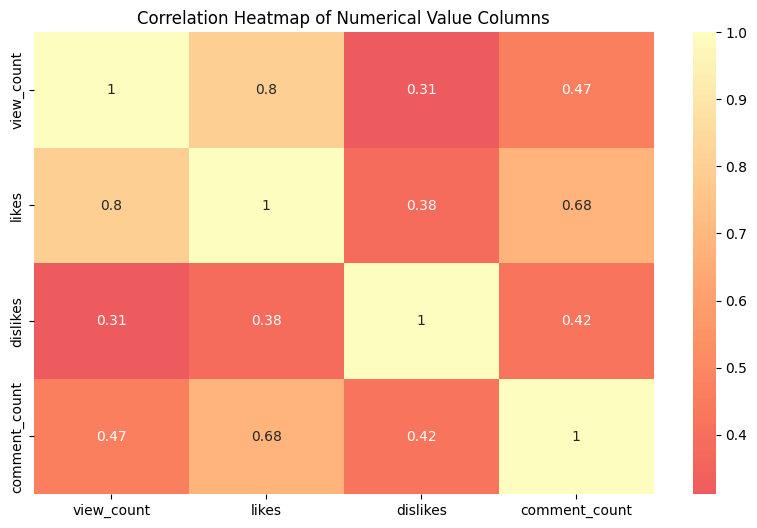

In [ ]:

numerical_columns = ['view_count', 'likes', 'dislikes', 'comment_count']


correlation_matrix = df[numerical_columns].corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', center=0)
plt.title('Correlation Heatmap of Numerical Value Columns')
plt.show()

**Title Word Choice**

Now that we have nicely cleaned our data, we will start analysing our data. We will start from what words are mostly used in video titles by counting how many the same words has been used and folow on after that first lets find them.

In [ ]:
cnt = Counter()

# Finding the occurence of words in video titles
for title in df['title_cl']:
    for token in title.split():
        cnt[token] += 1

# Finding the 50 most used words in video titles
dist = cnt.most_common(50)
top_words = []
freqs = []
for word, freq in dist:
    top_words.append(word)
    freqs.append(freq)

<ipython-input-16-c63210b279a8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words,y=freqs, palette="pastel")


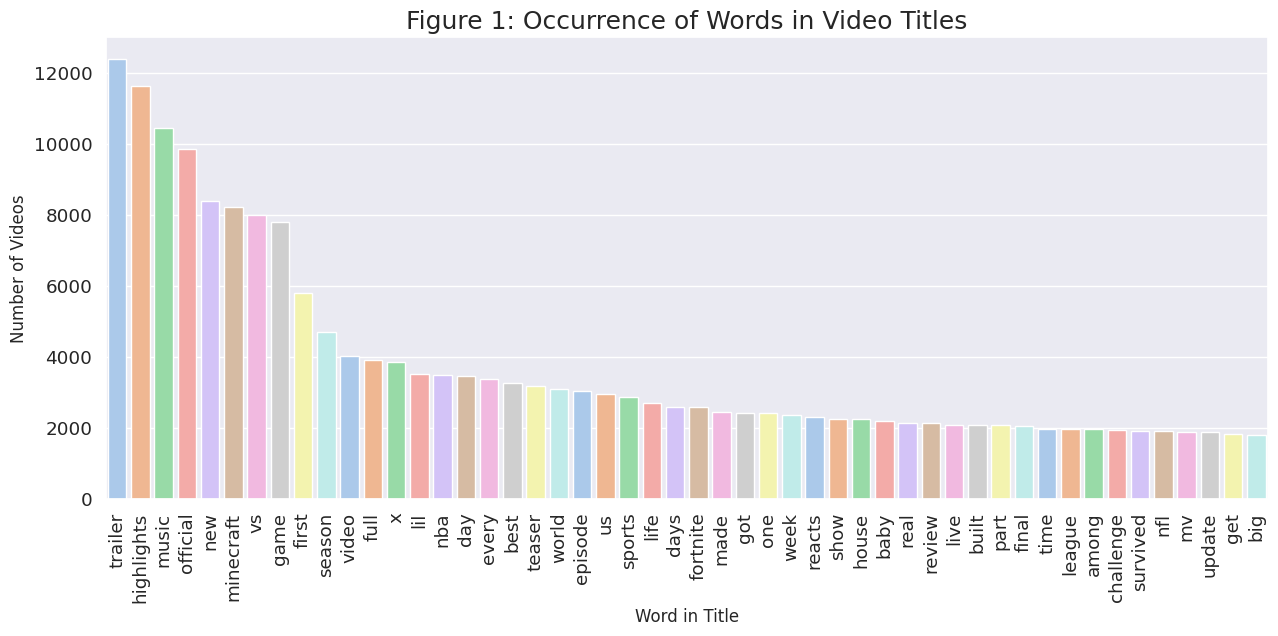

In [ ]:
fig= plt.figure(figsize=(15,6))
sns.set_style("whitegrid")
sns.set(font_scale=1.2)

sns.barplot(x=top_words,y=freqs, palette="pastel")

plt.xticks(rotation=90)
plt.xlabel('Word in Title', fontsize=12)
plt.ylabel('Number of Videos', fontsize=12)
plt.title('Figure 1: Occurrence of Words in Video Titles', fontsize=18)
plt.show()

From Figure 1, We can see that the top ten words are trailer, highlights, music, official, minecraft, new, vs, game, first, season it seems that some words quict nicely go together like **"official trailer", "new music", "official music", "new game", "new season", "new minecraft season", etc...**

Video Categories

Now we will find what catagory of trending videos are most and least common by looking at the frequencies of video categories.

<ipython-input-17-ba0d2e926113>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories.index, y=categories.values, alpha=0.8, palette="pastel")


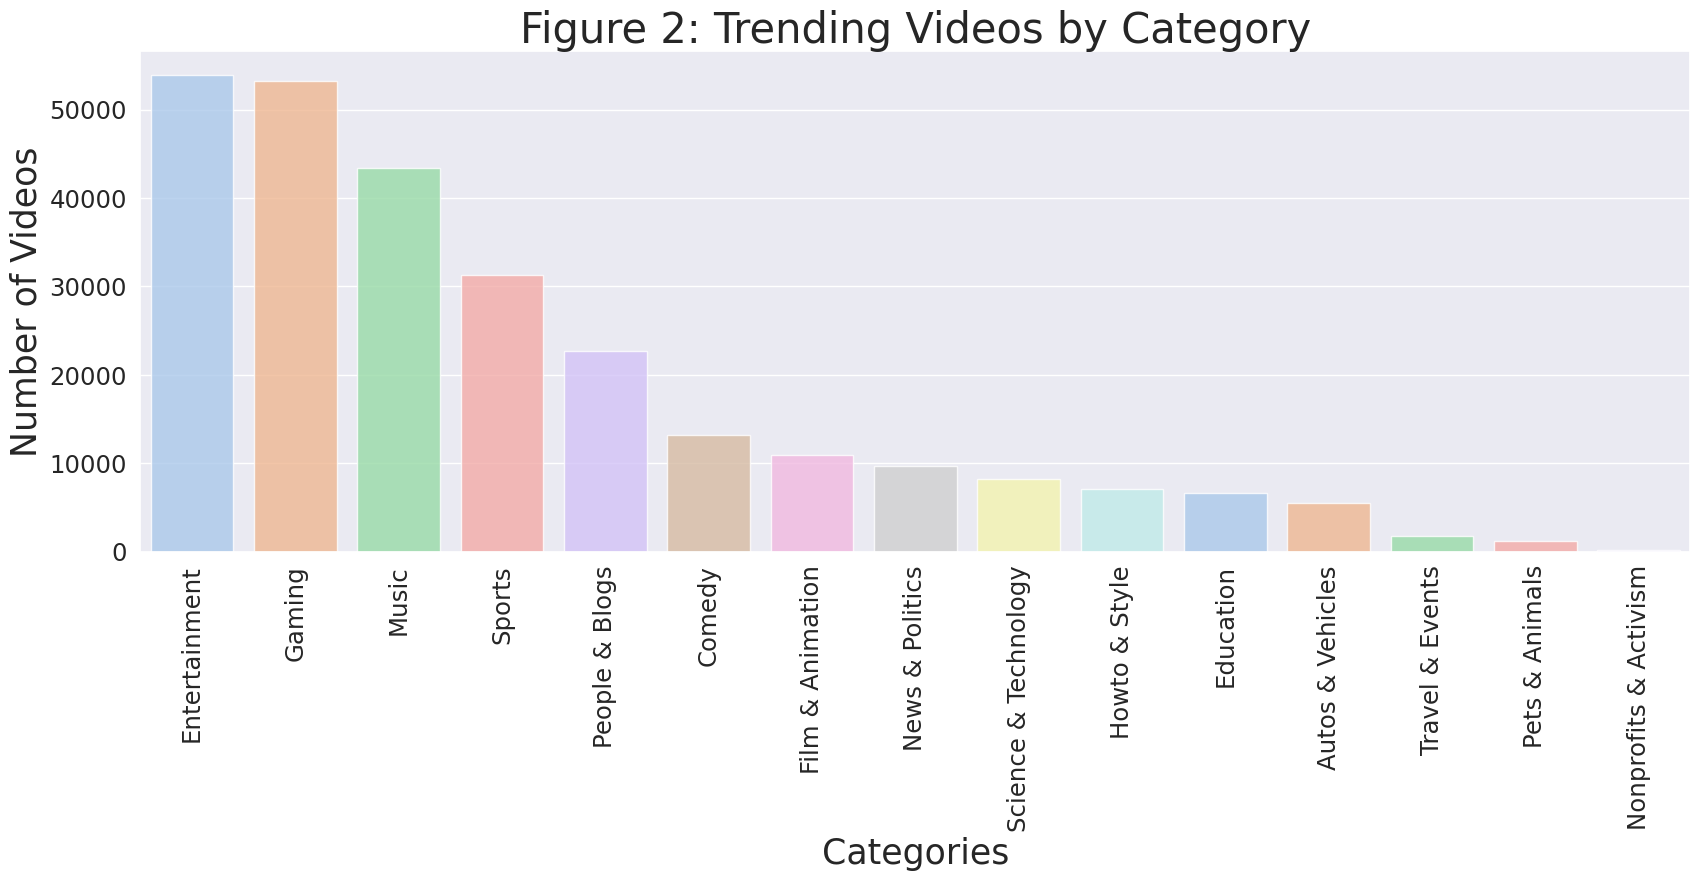

In [ ]:
sns.set_style("whitegrid")
sns.set(font_scale=1.6)

categories = df['categoryId'].value_counts()

plt.figure(figsize=(20,6.5))
sns.barplot(x=categories.index, y=categories.values, alpha=0.8, palette="pastel")

sns.set(font_scale=1.6)
plt.xticks(rotation=90)
plt.xlabel('Categories', fontsize=25)
plt.ylabel('Number of Videos', fontsize=25)
plt.title('Figure 2: Trending Videos by Category', fontsize=30)
plt.show()

From Figure 2, we can see that the Entertainment category has the most number of trending videos with about 45,000 approximate which accounts for about a one fifth of the videos in this dataset. Similarly we can also see that the Gaming category has almost same but less amount of videos about 42,000 approximate which accounts for another one fifth of the vidoes in the dataset. The Music catagory has vidoe count bellow 40,000 but no other catagory has even reached 30,000 other then music but lets not negate the fact that the sport catagory has over 25,000 video count other then these four major catagory rest of them dosent even have 20,000 video count.

To see the percentage of these four categories more acurately lets run the following code additionally lets see for the least 3 categories also.

In [ ]:
# Caculating the percentages for top 4 categories
entertainment = df[df['categoryId'] == 'Entertainment']['categoryId'].count() / df['categoryId'].count() * 100
gaming = df[df['categoryId'] == 'Gaming']['categoryId'].count() / df['categoryId'].count() * 100
music = df[df['categoryId'] == 'Music']['categoryId'].count() / df['categoryId'].count() * 100
sports = df[df['categoryId'] == 'Sports']['categoryId'].count() / df['categoryId'].count() * 100

# Calculating the percentages for bottom 3 categories
travelandevents = df[df['categoryId'] == 'Travel & Events']['categoryId'].count() / df['categoryId'].count() * 100
petsandanimals = df[df['categoryId'] == 'Pets & Animals']['categoryId'].count() / df['categoryId'].count() * 100
nonprofits = df[df['categoryId'] == 'Nonprofits & Activism']['categoryId'].count() / df['categoryId'].count() * 100

In [ ]:
print("Top 5:")
print("Entertainment:",entertainment)
print("Gaming:",gaming)
print("Music:",music)
print("Sports:",sports)
print("\n")
print("Least 3:")
print("Travel & Events:",travelandevents)
print("Pets & Animals",petsandanimals)
print("Nonprofits & Activism",nonprofits)

Top 5:
Entertainment: 20.06570258234215
Gaming: 19.808249654931227
Music: 16.14587014997005
Sports: 11.654953550580943


Least 3:
Travel & Events: 0.6373076078828217
Pets & Animals 0.4546350827979032
Nonprofits & Activism 0.044645016314033045


After doing the calculation for the percentages of categories, it is noteworthiy that Entertainment(20.05%), Gaming(19.79%), Music(16.49%), Sports(11.24%) make up 67.67% of the trending videos. The common thing is that these type of videos are mostly leisure type except for sports.


**Channel Frequencies**

Now lets see which chanels have a large number of trending videos. Based on our previous catagory analysis, we can assume that the channels with the most number of trending videos will be Entertainment, Gaming, Music and Sports chanel. We can start by calculating the trending video frequency for each channel.

<ipython-input-20-bedbf7e8e8cc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_freq.index, y=channel_freq.values, alpha=0.8, palette="pastel")


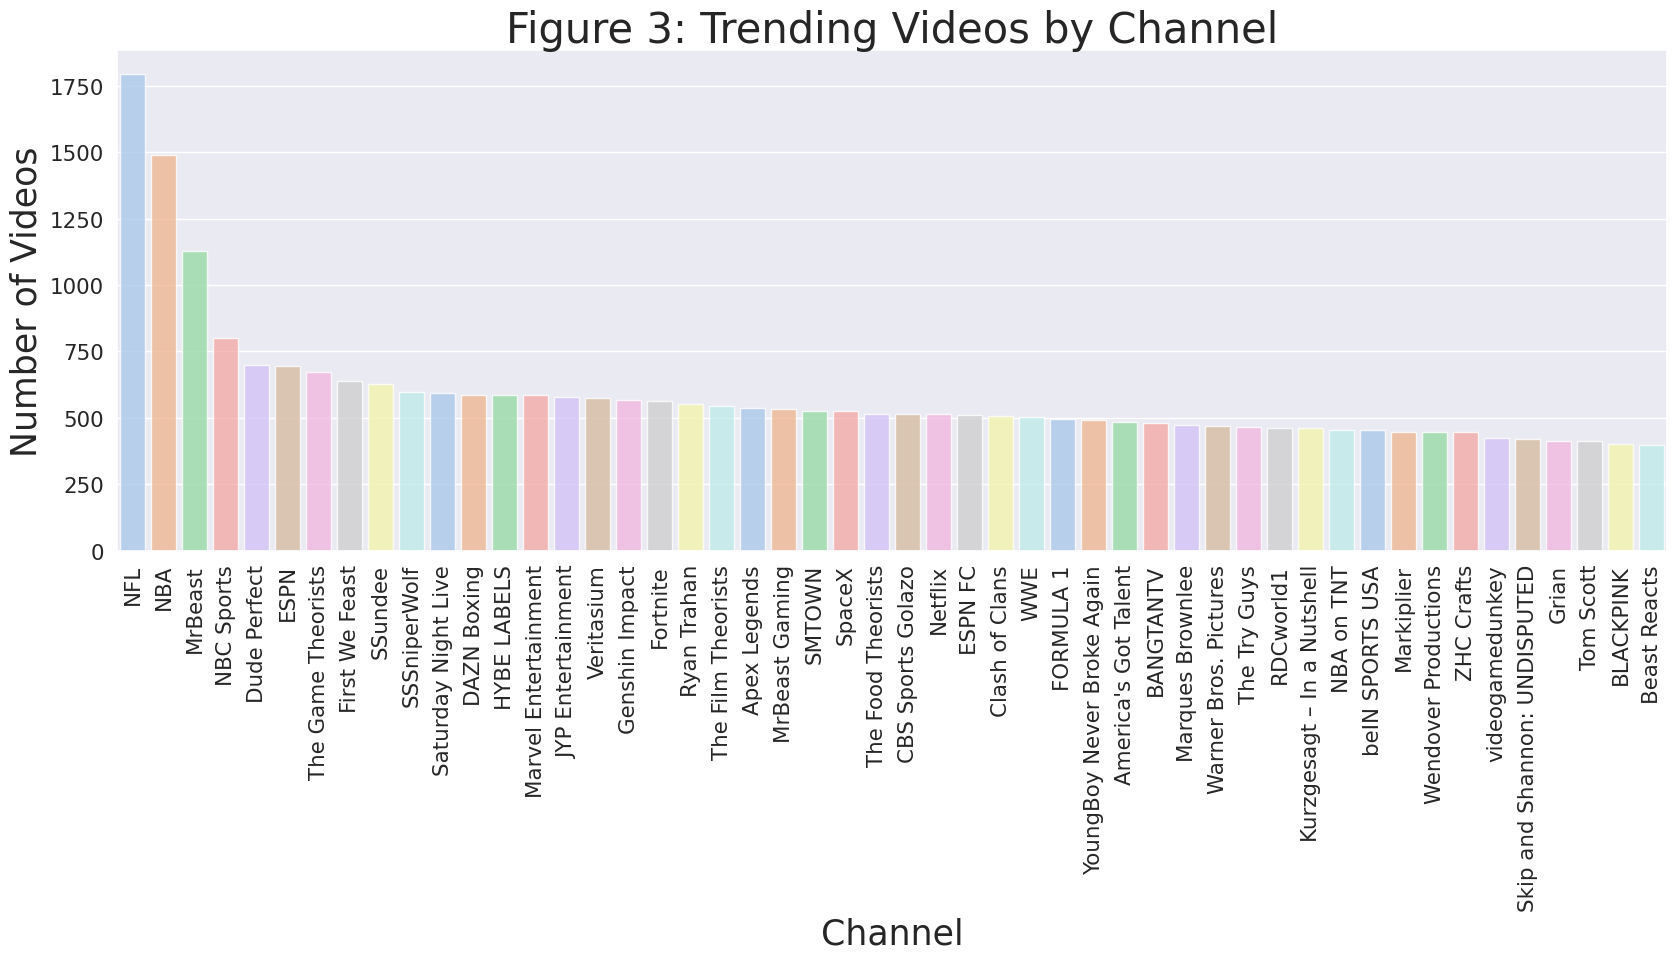

In [ ]:
sns.set_style("whitegrid")
sns.set(font_scale=1.4)

channel_freq = df['channelTitle'].value_counts()
channel_freq = channel_freq[0:50]

# Bar graph for number of videos for the top 50 channels
plt.figure(figsize=(20, 6.5))
sns.barplot(x=channel_freq.index, y=channel_freq.values, alpha=0.8, palette="pastel")

plt.xticks(rotation=90)
plt.xlabel('Channel', fontsize=25)
plt.ylabel('Number of Videos', fontsize=25)
plt.title('Figure 3: Trending Videos by Channel', fontsize=30)
plt.show()

From, the graph, we can see that NBA(near 1300+ videos), neek to neek NFL(near 1300 videos), after these two others are starting from NBC Sports(600+ videos) and rest of them are near 600 or less then 600 to 400. Here is the top 10 chanels with trending videos and their respective Catagory.

NBA:         Sports

NFL:         Sports

NBC Sports:       Sports

SSundee: Gaming

SSSniperWlof: Reaction, Vlogs, Gaming

MrBeast: Entertainment, Vlogs, Gaming

Dude Perfect: Sports & Vlogs

ESPN: Sports

The Game Theorists: Education & Gaming

MrBeast Gaming: Gaming

In [ ]:
channel_freq[0:10]

channelTitle
NFL                   1793
NBA                   1489
MrBeast               1127
NBC Sports             802
Dude Perfect           699
ESPN                   695
The Game Theorists     674
First We Feast         640
SSundee                629
SSSniperWolf           599
Name: count, dtype: int64


So we can easily say that NBA & NFL are untuchable in number of trending videos.

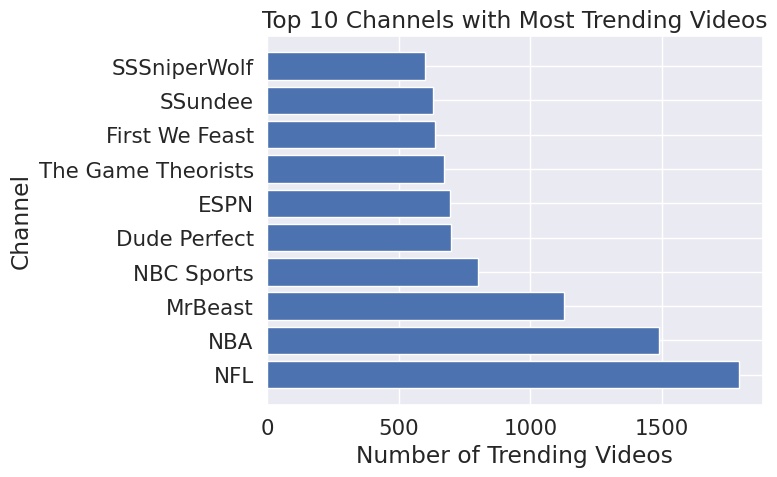

In [ ]:
import matplotlib.pyplot as plt

# Group by 'channelTitle' instead of 'channel_title'
channel_counts = df.groupby('channelTitle')['title'].count()

# Sort the channels by the number of trending videos in descending order
sorted_channels = channel_counts.sort_values(ascending=False)

# Plot the result on a horizontal bar graph
plt.barh(sorted_channels.index[:10], sorted_channels.values[:10])
plt.title('Top 10 Channels with Most Trending Videos')
plt.xlabel('Number of Trending Videos')
plt.ylabel('Channel')
plt.show()


1: 'Film & Animation',

 2: 'Autos & Vehicles',

 10: 'Music',

 15: 'Pets & Animals',

 17: 'Sports',

 18: 'Short Movies',

 19: 'Travel & Events',

 20: 'Gaming',

 21: 'Videoblogging',

 22: 'People & Blogs',

 23: 'Comedy',

 24: 'Entertainment',

 25: 'News & Politics',

 26: 'Howto & Style',

 27: 'Education',

 28: 'Science & Technology',

 29: 'Nonprofits & Activism',

 30: 'Movies',

 31: 'Anime/Animation',

 32: 'Action/Adventure',

 33: 'Classics',

 34: 'Comedy',

 35: 'Documentary',

 36: 'Drama',

 37: 'Family',

 38: 'Foreign',

 39: 'Horror',

 40: 'Sci-Fi/Fantasy',

 41: 'Thriller',

 42: 'Shorts',

 43: 'Shows',

 44: 'Trailers'

In [ ]:
!pip install bar_chart_race


In [ ]:
# Check column names
print(df.columns)

# Inspect DataFrame
print(df.head())


Index(['title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId',
       'trending_date', 'tags', 'view_count', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled', 'title_cl'],
      dtype='object')
                                               title publishedAt  \
0                 I ASKED HER TO BE MY GIRLFRIEND...  2020-08-11   
1  Apex Legends | Stories from the Outlands – “Th...  2020-08-11   
2  I left youtube for a month and THIS is what ha...  2020-08-11   
3  XXL 2020 Freshman Class Revealed - Official An...  2020-08-11   
4  Ultimate DIY Home Movie Theater for The LaBran...  2020-08-11   

                  channelId   channelTitle      categoryId trending_date  \
0  UCvtRTOMP2TqYqu51xNrqAzg       Brawadis  People & Blogs    2020-08-12   
1  UC0ZV6M2THA81QT9hrVWJG3A   Apex Legends          Gaming    2020-08-12   
2  UCYzPXprvl5Y-Sf0g4vX-m6g  jacksepticeye   Entertainment    2020-08-12   
3  UCbg_UMjlHJg_19SZckaKajg            XXL    

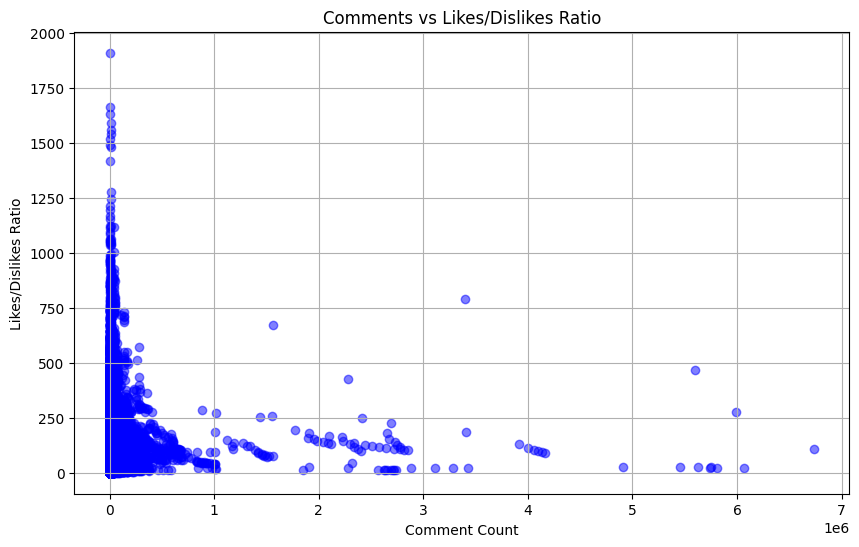

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df['likes_dislikes_ratio'] = df['likes'] / df['dislikes']


plt.figure(figsize=(10, 6))
plt.scatter(df['comment_count'], df['likes_dislikes_ratio'], color='blue', alpha=0.5)
plt.title('Comments vs Likes/Dislikes Ratio')
plt.xlabel('Comment Count')
plt.ylabel('Likes/Dislikes Ratio')
plt.grid(True)
plt.show()


In [ ]:

high_views = df[df['view_count'] >= 1000000]


all_tags = high_views['tags'].str.split('|').tolist()
all_tags = [tag for tags in all_tags for tag in tags]


tag_counts = pd.Series(all_tags).value_counts()

print(tag_counts.head(10))


[None]             21440
funny               7930
comedy              4898
minecraft           4543
challenge           3498
family friendly     2233
highlights          2179
vlog                2016
football            1963
gaming              1933
Name: count, dtype: int64


In [ ]:
import plotly.graph_objs as go


bar = go.Bar(
    x=tag_counts.head(10).index,
    y=tag_counts.head(10).values,
    marker=dict(color=tag_counts.head(10).values, colorscale='Viridis'),
)


layout = go.Layout(
    title='Top 10 Most Commonly Used Tags in Videos with High Views',
    xaxis=dict(title='Tag'),
    yaxis=dict(title='Count'),
)


fig = go.Figure(data=[bar], layout=layout)
fig.show()


In [ ]:
from IPython.display import display


sub_df = df.groupby('title')[['view_count', 'likes', 'dislikes','comment_count']].max()
sub_df.head()

sub_df_filtered = sub_df[sub_df['dislikes'] != 0]


display(sub_df_filtered.head())


view_count  likes  \
title                                                                   
!@#$%$#!! || Dubov vs Carlsen || Airthings Mast...      609588  25234   
#1 76ERS at #5 HAWKS | FULL GAME HIGHLIGHTS | J...     1605052  16700   
#1 Alabama Crimson Tide vs. LSU Tigers: Extende...      335967   1644   
#1 Alabama Vs Texas A&M Extended Highlights | C...      635561   5203   
#2 NETS at #3 BUCKS | FULL GAME HIGHLIGHTS | Ju...     2032845  16916   

                                                    dislikes  comment_count  
title                                                                        
!@#$%$#!! || Dubov vs Carlsen || Airthings Mast...       283           2186  
#1 76ERS at #5 HAWKS | FULL GAME HIGHLIGHTS | J...       715           5566  
#1 Alabama Crimson Tide vs. LSU Tigers: Extende...       102            493  
#1 Alabama Vs Texas A&M Extended Highlights | C...       206           1228  
#2 NETS at #3 BUCKS | FULL GAME HIGHLIGHTS | Ju...       787           3641

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from current font.



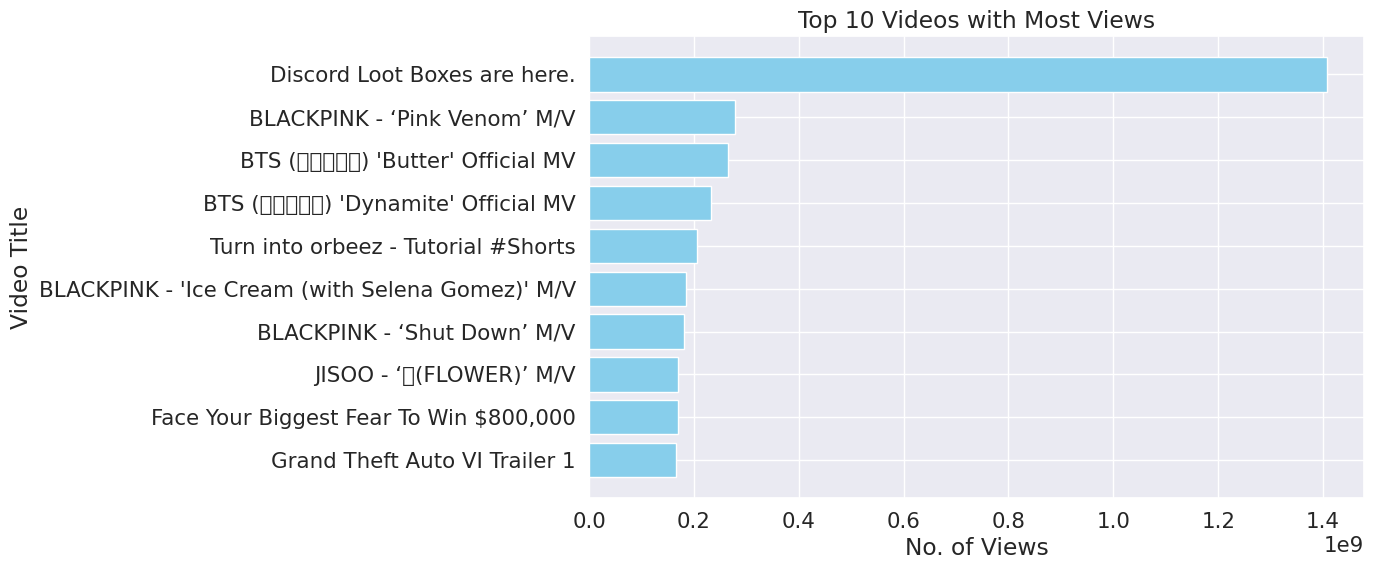

In [ ]:
import matplotlib.pyplot as plt

# Sorting the view count in descending order and getting the top 10 videos
g = sub_df['view_count'].sort_values(ascending=False)[:10]

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.barh(g.index, g.values, color='skyblue')
plt.xlabel('No. of Views')
plt.ylabel('Video Title')
plt.title('Top 10 Videos with Most Views')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest view count at the top
plt.show()


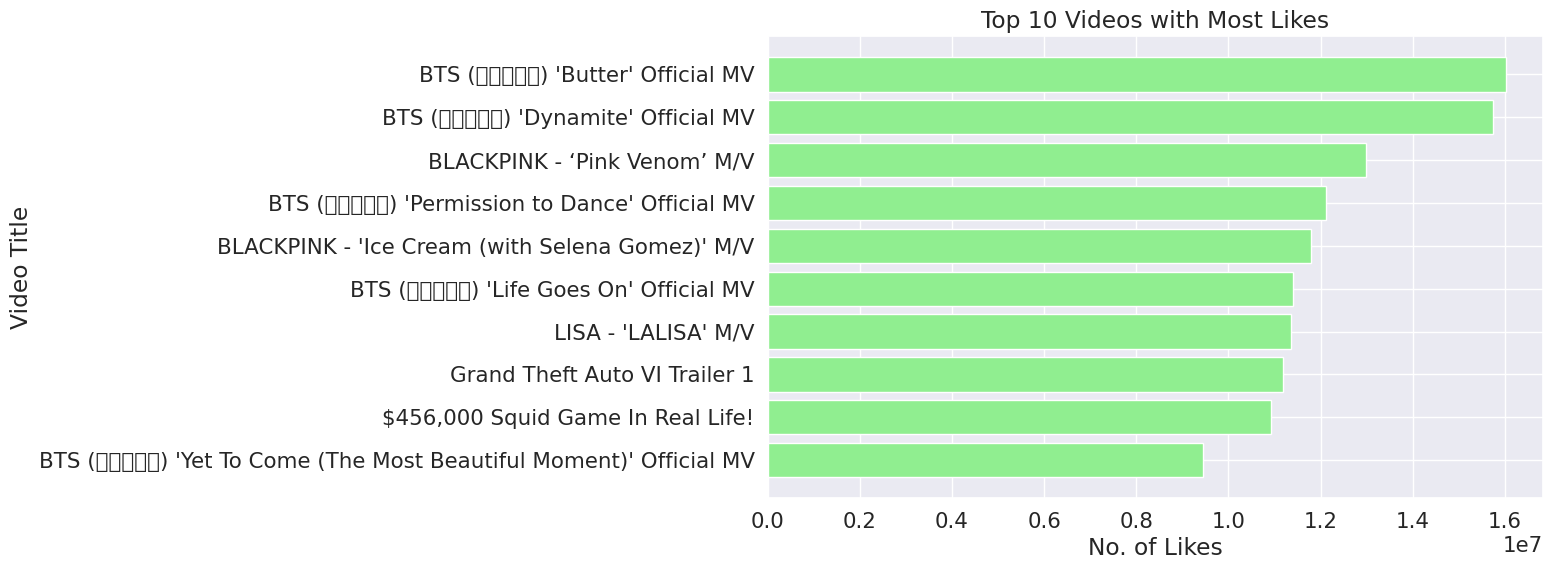

In [ ]:
g = sub_df['likes'].sort_values(ascending=False)[:10]

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.barh(g.index, g.values, color='lightgreen')
plt.xlabel('No. of Likes')
plt.ylabel('Video Title')
plt.title('Top 10 Videos with Most Likes')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest like count at the top
plt.show()

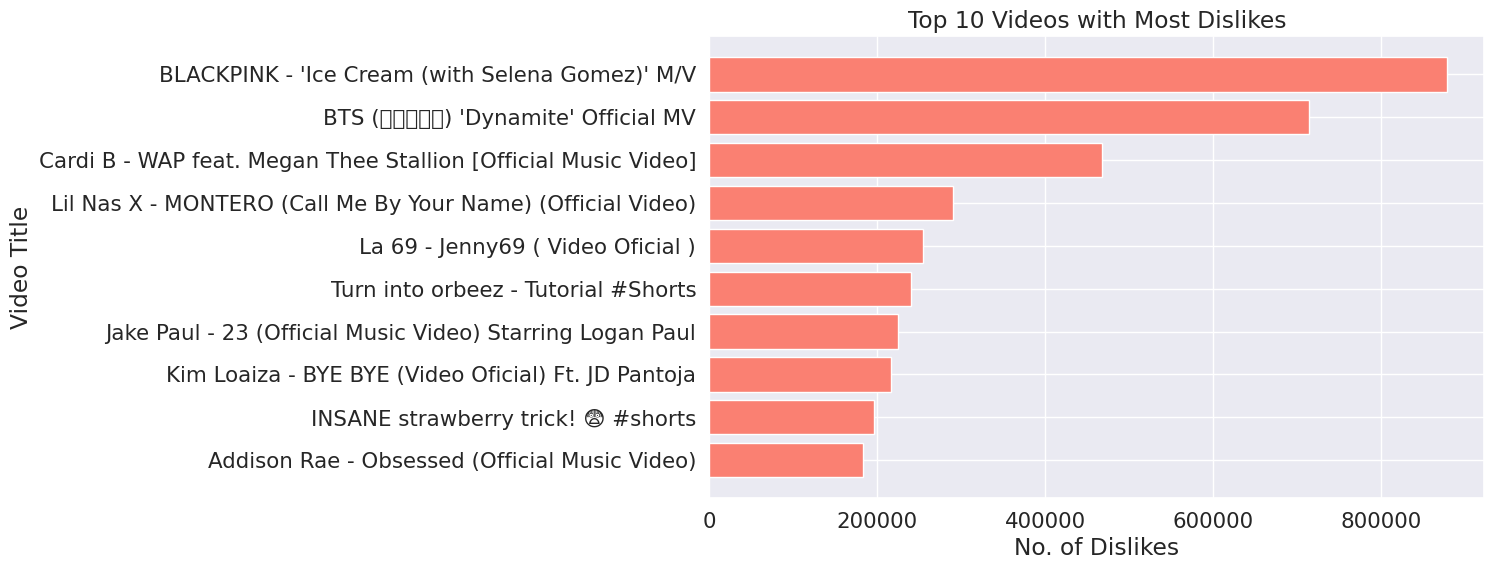

In [ ]:
g = sub_df['dislikes'].sort_values(ascending=False)[:10]

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.barh(g.index, g.values, color='salmon')
plt.xlabel('No. of Dislikes')
plt.ylabel('Video Title')
plt.title('Top 10 Videos with Most Dislikes')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest dislike count at the top
plt.show()

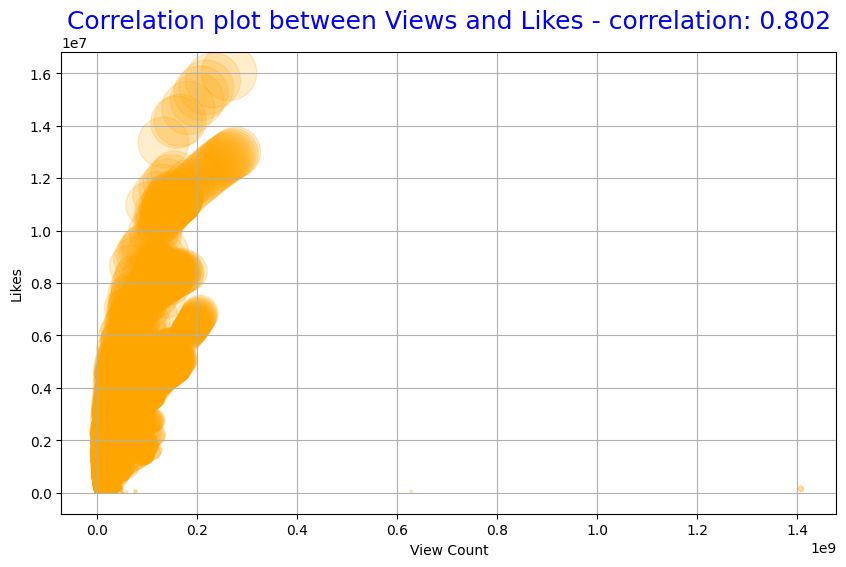

In [ ]:
import matplotlib.pyplot as plt


corr = df['likes'].corr(df['view_count'])


plt.figure(figsize=(10, 6))
plt.scatter(df['view_count'], df['likes'], color='orange', alpha=0.2, s=df['likes']/10000)
plt.title(f"Correlation plot between Views and Likes - correlation: {corr:.3f}", fontdict={'size': 18, 'color': 'blue'})
plt.xlabel('View Count')
plt.ylabel('Likes')
plt.grid(True)
plt.show()


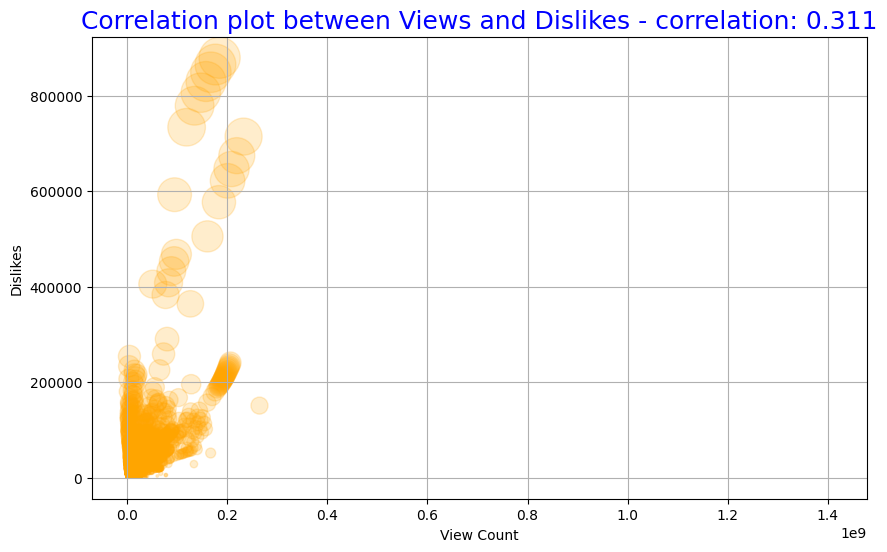

In [ ]:
corr = df['dislikes'].corr(df['view_count'])

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['view_count'], df['dislikes'], color='orange', alpha=0.2, s=df['dislikes']/1000)
plt.title(f"Correlation plot between Views and Dislikes - correlation: {corr:.3f}", fontdict={'size': 18, 'color': 'blue'})
plt.xlabel('View Count')
plt.ylabel('Dislikes')
plt.grid(True)
plt.show()

1.Are there any specific days of the week when certain categories of videos tend to perform better in terms of views?

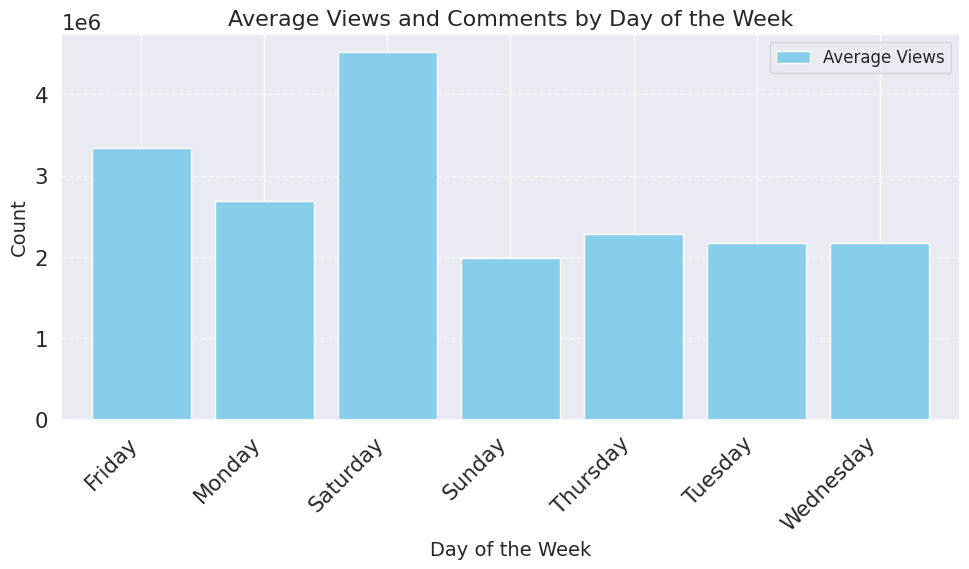

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'publishedAt' to datetime
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Extract the day of the week from the 'publishedAt' column
df['publish_day'] = df['publishedAt'].dt.day_name()

# Group the data by the 'publish_day' column and calculate the average views and comments
avg_views_comments = df.groupby('publish_day')[['view_count']].mean()

# Plot the result on a bar graph with custom styling
avg_views_comments.plot(kind='bar', color=['skyblue', 'orange'], figsize=(10, 6), width=0.8)
plt.title('Average Views and Comments by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.legend(['Average Views', 'Average Comments'], fontsize=12)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


ANOVA STATISTICAL ANALYSIS

Comparison of Engagement Metrics Across Categories:

In [ ]:
from scipy.stats import f_oneway
category_groups = df.groupby('categoryId')

# Create empty lists to store engagement metrics for each category
views_by_category = []
likes_by_category = []
comments_by_category = []

# Iterate over each category group and extract engagement metrics
for category, group in category_groups:
    views_by_category.append(group['view_count'])
    likes_by_category.append(group['likes'])
    comments_by_category.append(group['comment_count'])

# Perform one-way ANOVA tests for each engagement metric
views_anova = f_oneway(*views_by_category)
likes_anova = f_oneway(*likes_by_category)
comments_anova = f_oneway(*comments_by_category)

# Print ANOVA results
print("ANOVA results for Views:")
print("F-statistic:", views_anova.statistic)
print("p-value:", views_anova.pvalue)
print("\nANOVA results for Likes:")
print("F-statistic:", likes_anova.statistic)
print("p-value:", likes_anova.pvalue)
print("\nANOVA results for Comments:")
print("F-statistic:", comments_anova.statistic)
print("p-value:", comments_anova.pvalue)

ANOVA results for Views:
F-statistic: 337.37137174286084
p-value: 0.0

ANOVA results for Likes:
F-statistic: 580.088956505563
p-value: 0.0

ANOVA results for Comments:
F-statistic: 240.17218934124494
p-value: 0.0


Comparison of Day of week with Engagement Metrics

In [ ]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Extract the day of the week from the 'publishedAt' column
df['day_of_week'] = df['publishedAt'].dt.day_name()

# Group data by day of the week
day_groups = df.groupby('day_of_week')

# Create empty lists to store engagement metrics for each day of the week
views_by_day = []
likes_by_day = []
comments_by_day = []

# Iterate over each day group and extract engagement metrics
for day, group in day_groups:
    views_by_day.append(group['view_count'])
    likes_by_day.append(group['likes'])
    comments_by_day.append(group['comment_count'])

# Perform one-way ANOVA tests for each engagement metric
views_anova = f_oneway(*views_by_day)
likes_anova = f_oneway(*likes_by_day)
comments_anova = f_oneway(*comments_by_day)

# Print ANOVA results
print("ANOVA results for Views:")
print("F-statistic:", views_anova.statistic)
print("p-value:", views_anova.pvalue)
print("\nANOVA results for Likes:")
print("F-statistic:", likes_anova.statistic)
print("p-value:", likes_anova.pvalue)
print("\nANOVA results for Comments:")
print("F-statistic:", comments_anova.statistic)
print("p-value:", comments_anova.pvalue)

ANOVA results for Views:
F-statistic: 314.1365740260018
p-value: 0.0

ANOVA results for Likes:
F-statistic: 381.4463942180841
p-value: 0.0

ANOVA results for Comments:
F-statistic: 174.47241333753104
p-value: 1.8166324254762443e-222


Comparison of Channel Title with Engagement Metrics

In [ ]:
channel_groups = df.groupby('channelTitle')

# Create empty lists to store engagement metrics for each channel
views_by_channel = []
likes_by_channel = []
comments_by_channel = []

# Iterate over each channel group and extract engagement metrics
for channel, group in channel_groups:
    views_by_channel.append(group['view_count'])
    likes_by_channel.append(group['likes'])
    comments_by_channel.append(group['comment_count'])

# Perform one-way ANOVA tests for each engagement metric
views_anova = f_oneway(*views_by_channel)
likes_anova = f_oneway(*likes_by_channel)
comments_anova = f_oneway(*comments_by_channel)

# Print ANOVA results
print("ANOVA results for Views:")
print("F-statistic:", views_anova.statistic)
print("p-value:", views_anova.pvalue)
print("\nANOVA results for Likes:")
print("F-statistic:", likes_anova.statistic)
print("p-value:", likes_anova.pvalue)
print("\nANOVA results for Comments:")
print("F-statistic:", comments_anova.statistic)
print("p-value:", comments_anova.pvalue)

ANOVA results for Views:
F-statistic: 32.13192462637454
p-value: 0.0

ANOVA results for Likes:
F-statistic: 41.17868002677844
p-value: 0.0

ANOVA results for Comments:
F-statistic: 11.79955109562775
p-value: 0.0


Comparison of views for comments disabled vs comments enabled

In [ ]:
import pandas as pd
from scipy.stats import f_oneway


views_comments_enabled = df[df['comments_disabled'] == False]['view_count']
views_comments_disabled = df[df['comments_disabled'] == True]['view_count']

# Perform one-way ANOVA test for views between videos with comments enabled and disabled
views_anova = f_oneway(views_comments_enabled, views_comments_disabled)

# Calculate the mean views for both groups
mean_views_comments_enabled = views_comments_enabled.mean()
mean_views_comments_disabled = views_comments_disabled.mean()

# Print results
print("Mean Views for Videos with Comments Enabled:", mean_views_comments_enabled)
print("Mean Views for Videos with Comments Disabled:", mean_views_comments_disabled)
print("\nANOVA results for Views (Comments Enabled vs Comments Disabled):")
print("F-statistic:", views_anova.statistic)
print("p-value:", views_anova.pvalue)


Mean Views for Videos with Comments Enabled: 2733755.6626293925
Mean Views for Videos with Comments Disabled: 2788259.791678541

ANOVA results for Views (Comments Enabled vs Comments Disabled):
F-statistic: 0.10725209486219485
p-value: 0.7432947954014888


In [ ]:
print(df.dtypes)

title                    object
publishedAt              object
channelId                object
channelTitle             object
categoryId               object
trending_date            object
tags                     object
view_count                int64
likes                     int64
dislikes                  int64
comment_count             int64
comments_disabled          bool
ratings_disabled           bool
title_cl                 object
likes_dislikes_ratio    float64
dtype: object


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency


# Create a contingency table
contingency_table = pd.crosstab(df['categoryId'], df['comments_disabled'])

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-square test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("\nChi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("\nExpected frequencies:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))


Contingency Table:
comments_disabled      False  True 
categoryId                         
Autos & Vehicles        5486      6
Comedy                 13168     15
Education               6605     50
Entertainment          53279    655
Film & Animation       10811    112
Gaming                 52741    501
Howto & Style           7053     47
Music                  43318     80
News & Politics         8685    984
Nonprofits & Activism    114      6
People & Blogs         22270    383
Pets & Animals          1222      0
Science & Technology    7556    600
Sports                 31260     67
Travel & Events         1710      3

Chi-square statistic: 9318.86029357398
p-value: 0.0
Degrees of freedom: 14

Expected frequencies:
comments_disabled             False       True 
categoryId                                     
Autos & Vehicles        5420.302232   71.697768
Comedy                 13010.896636  172.103364
Education               6568.119329   86.880671
Entertainment          53229.8

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency



# Pair 2: Category ID and Ratings Disabled
contingency_table2 = pd.crosstab(df['categoryId'], df['ratings_disabled'])
chi2_2, p_2, dof_2, expected_2 = chi2_contingency(contingency_table2)
print("\nPair 2: Category ID and Ratings Disabled")
print("Contingency Table:")
print(contingency_table2)
print("\nExpected frequencies:")
print(pd.DataFrame(expected_2, index=contingency_table2.index, columns=contingency_table2.columns))
print("\nChi-square statistic:", chi2_2)
print("p-value:", p_2)

# Pair 3: Comments Disabled and Ratings Disabled
contingency_table3 = pd.crosstab(df['comments_disabled'], df['ratings_disabled'])
chi2_3, p_3, dof_3, expected_3 = chi2_contingency(contingency_table3)
print("\nPair 3: Comments Disabled and Ratings Disabled")
print("Contingency Table:")
print(contingency_table3)
print("\nExpected frequencies:")
print(pd.DataFrame(expected_3, index=contingency_table3.index, columns=contingency_table3.columns))
print("\nChi-square statistic:", chi2_3)
print("p-value:", p_3)



Pair 2: Category ID and Ratings Disabled
Contingency Table:
ratings_disabled       False  True 
categoryId                         
Autos & Vehicles        5481     11
Comedy                 13159     24
Education               6625     30
Entertainment          53758    176
Film & Animation       10793    130
Gaming                 52861    381
Howto & Style           7051     49
Music                  43226    172
News & Politics         9580     89
Nonprofits & Activism    114      6
People & Blogs         22455    198
Pets & Animals          1214      8
Science & Technology    8099     57
Sports                 31124    203
Travel & Events         1709      4

Expected frequencies:
ratings_disabled              False       True 
categoryId                                     
Autos & Vehicles        5460.574760   31.425240
Comedy                 13107.566835   75.433165
Education               6616.920071   38.079929
Entertainment          53625.389494  308.610506
Film & Animation

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

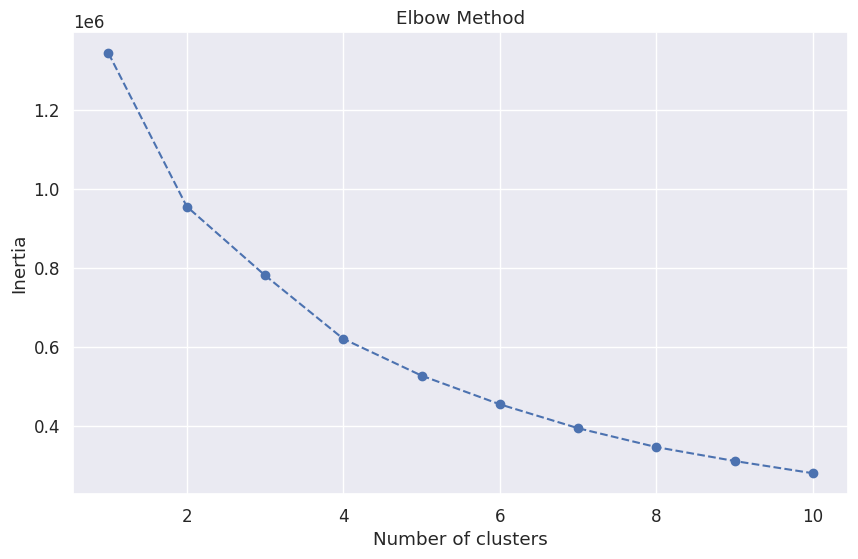

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


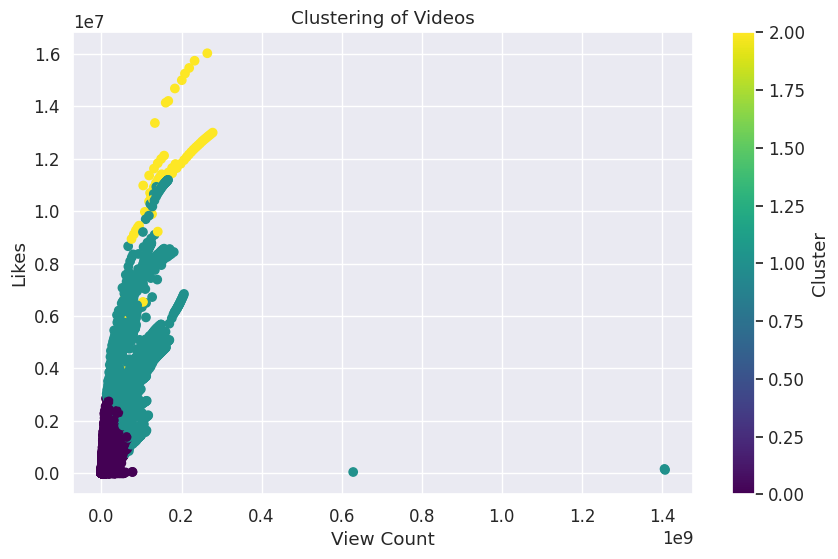

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


numeric_df = df[['view_count', 'likes', 'dislikes', 'comment_count', 'likes_dislikes_ratio']]

# Perform feature scaling (optional but recommended)
# This step is important when features have different scales
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_df)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Based on the elbow curve, choose the optimal number of clusters
# Let's assume you choose k=3

# Apply K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

# Add cluster labels to the original DataFrame
df['cluster'] = clusters

# Visualize the clusters (you can choose any two features for visualization)
plt.figure(figsize=(10, 6))
plt.scatter(df['view_count'], df['likes'], c=clusters, cmap='viridis')
plt.xlabel('View Count')
plt.ylabel('Likes')
plt.title('Clustering of Videos')
plt.colorbar(label='Cluster')
plt.show()

# Repeat visualization with other feature combinations to explore the clusters further


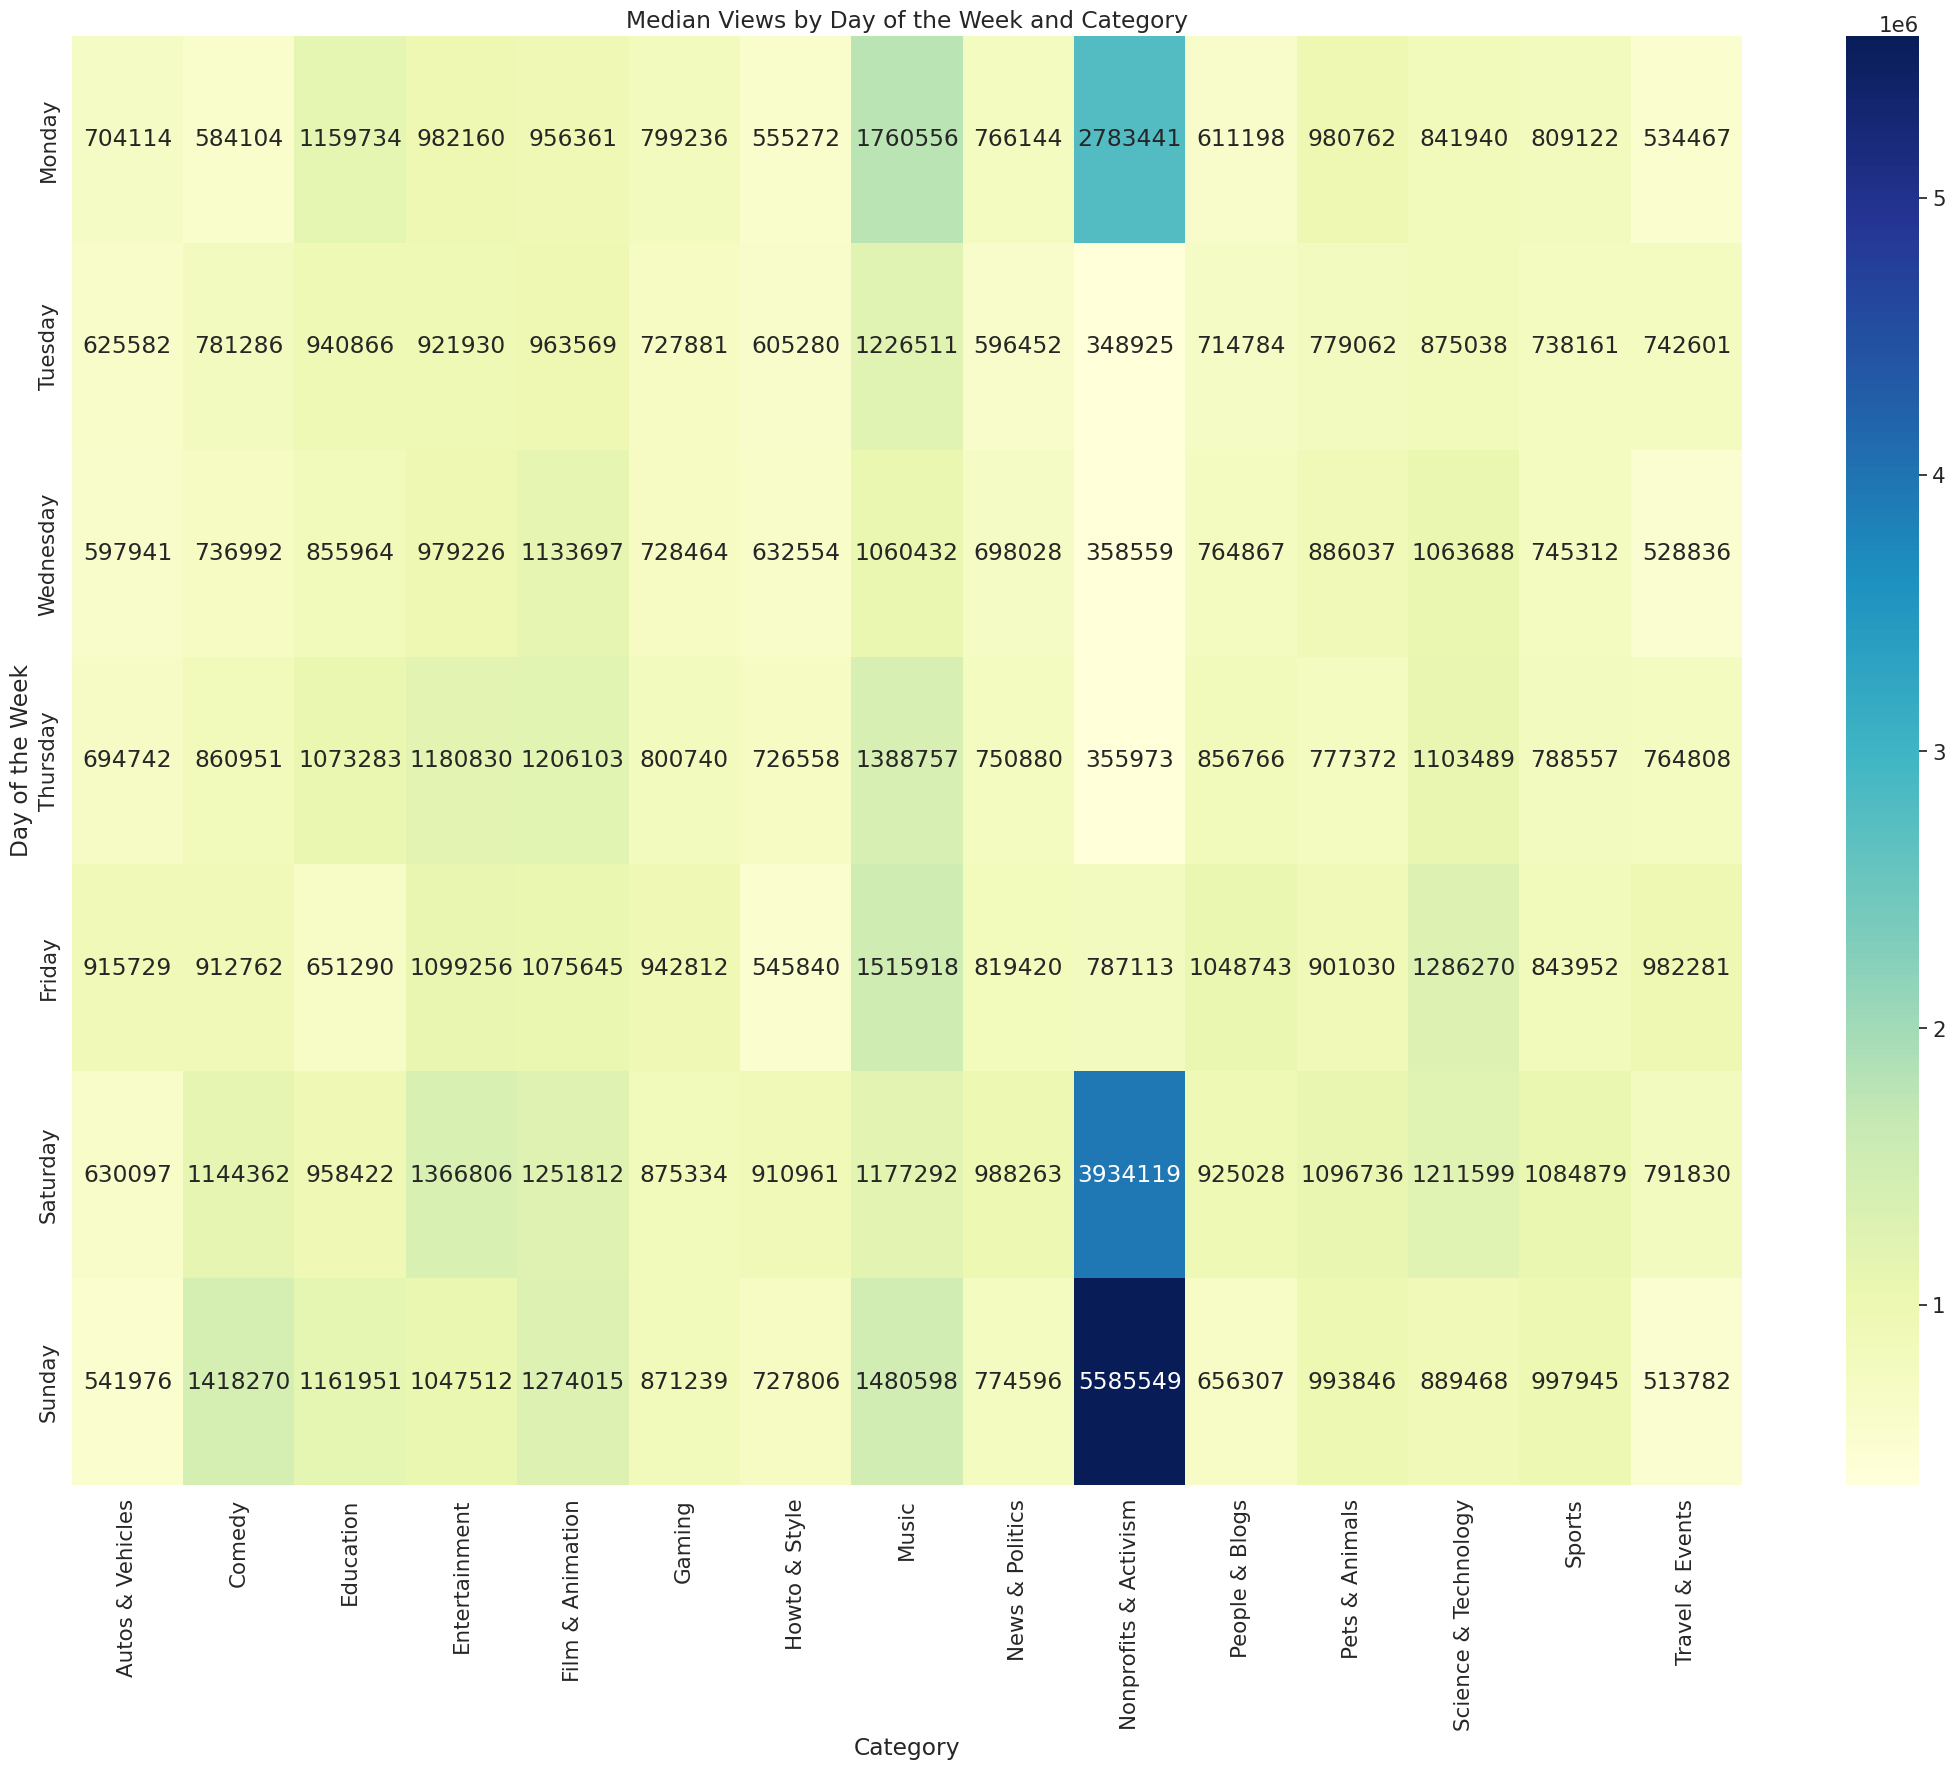

In [ ]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Extract day of the week
df['day_of_week'] = df['publishedAt'].dt.day_name()

# Group data by day of the week and category, and calculate median views
views_by_day_category = df.groupby(['day_of_week', 'categoryId'])['view_count'].median().unstack()

# Reorder days of the week for visualization
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
views_by_day_category = views_by_day_category.reindex(days_order)

# Plotting
plt.figure(figsize=(22, 18))
sns.heatmap(views_by_day_category, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title('Median Views by Day of the Week and Category')
plt.xlabel('Category')
plt.ylabel('Day of the Week')
plt.tight_layout()
plt.show()

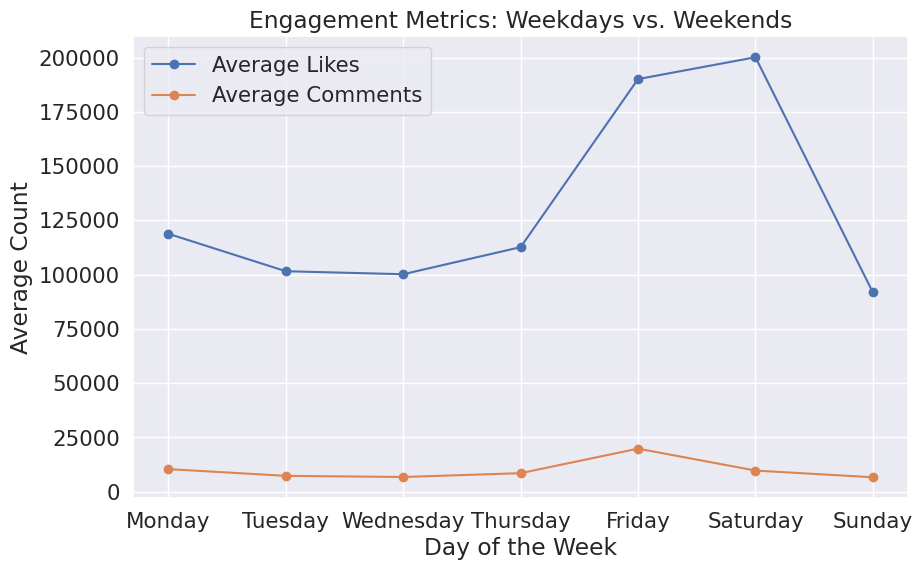

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into a DataFrame called 'df'

# Convert 'publishedAt' column to datetime
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Extract weekday name from the 'publishedAt' column
df['weekday'] = df['publishedAt'].dt.day_name()

# Group by weekday and calculate average likes and comments
engagement_by_weekday = df.groupby('weekday')[['likes', 'comment_count']].mean()

# Reorder weekdays for plotting
engagement_by_weekday = engagement_by_weekday.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(engagement_by_weekday.index, engagement_by_weekday['likes'], marker='o', label='Average Likes')
plt.plot(engagement_by_weekday.index, engagement_by_weekday['comment_count'], marker='o', label='Average Comments')
plt.title('Engagement Metrics: Weekdays vs. Weekends')
plt.xlabel('Day of the Week')
plt.ylabel('Average Count')
plt.legend()
plt.grid(True)
plt.show()


ANOVA p-value: 0.0


<ipython-input-43-6d11246f78ab>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




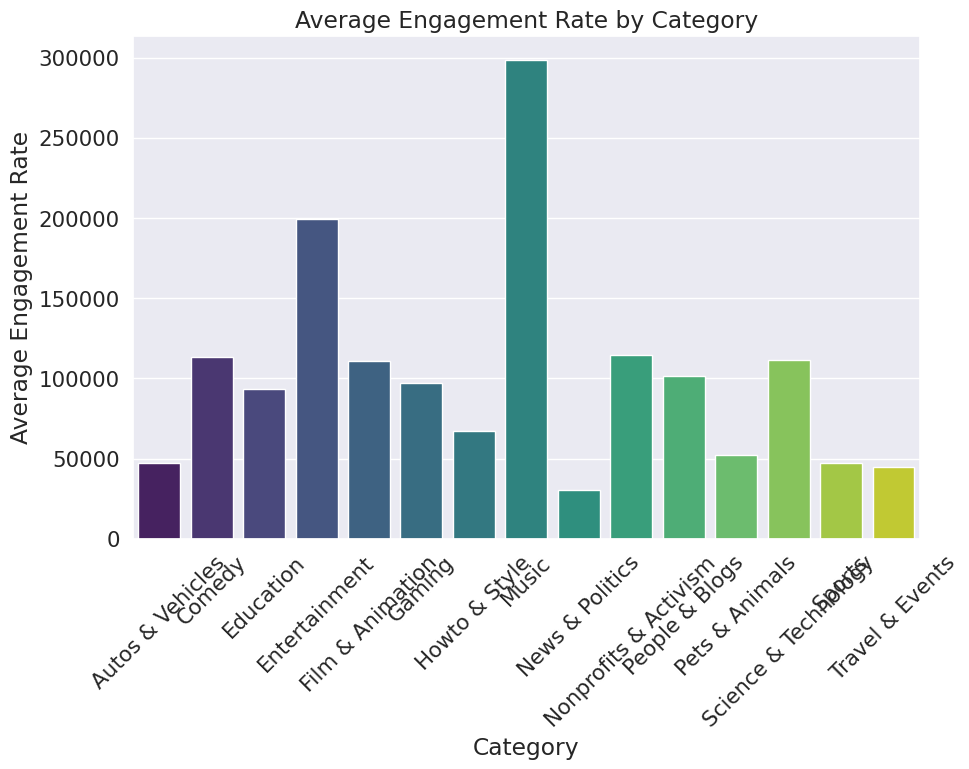

In [ ]:
from scipy.stats import f_oneway
df['engagement_rate'] = df['likes'] + df['comment_count']

# Group data by category and calculate average engagement rate
avg_engagement_by_category = df.groupby('categoryId')['engagement_rate'].mean().reset_index()

# Statistical analysis
# Perform ANOVA test to compare average engagement rates across different categories
anova_result = f_oneway(*[df[df['categoryId'] == category]['engagement_rate'] for category in df['categoryId'].unique()])
print("ANOVA p-value:", anova_result.pvalue)

# Visualization
plt.figure(figsize=(10, 8))
sns.barplot(data=avg_engagement_by_category, x='categoryId', y='engagement_rate', palette='viridis')
plt.title('Average Engagement Rate by Category')
plt.xlabel('Category')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

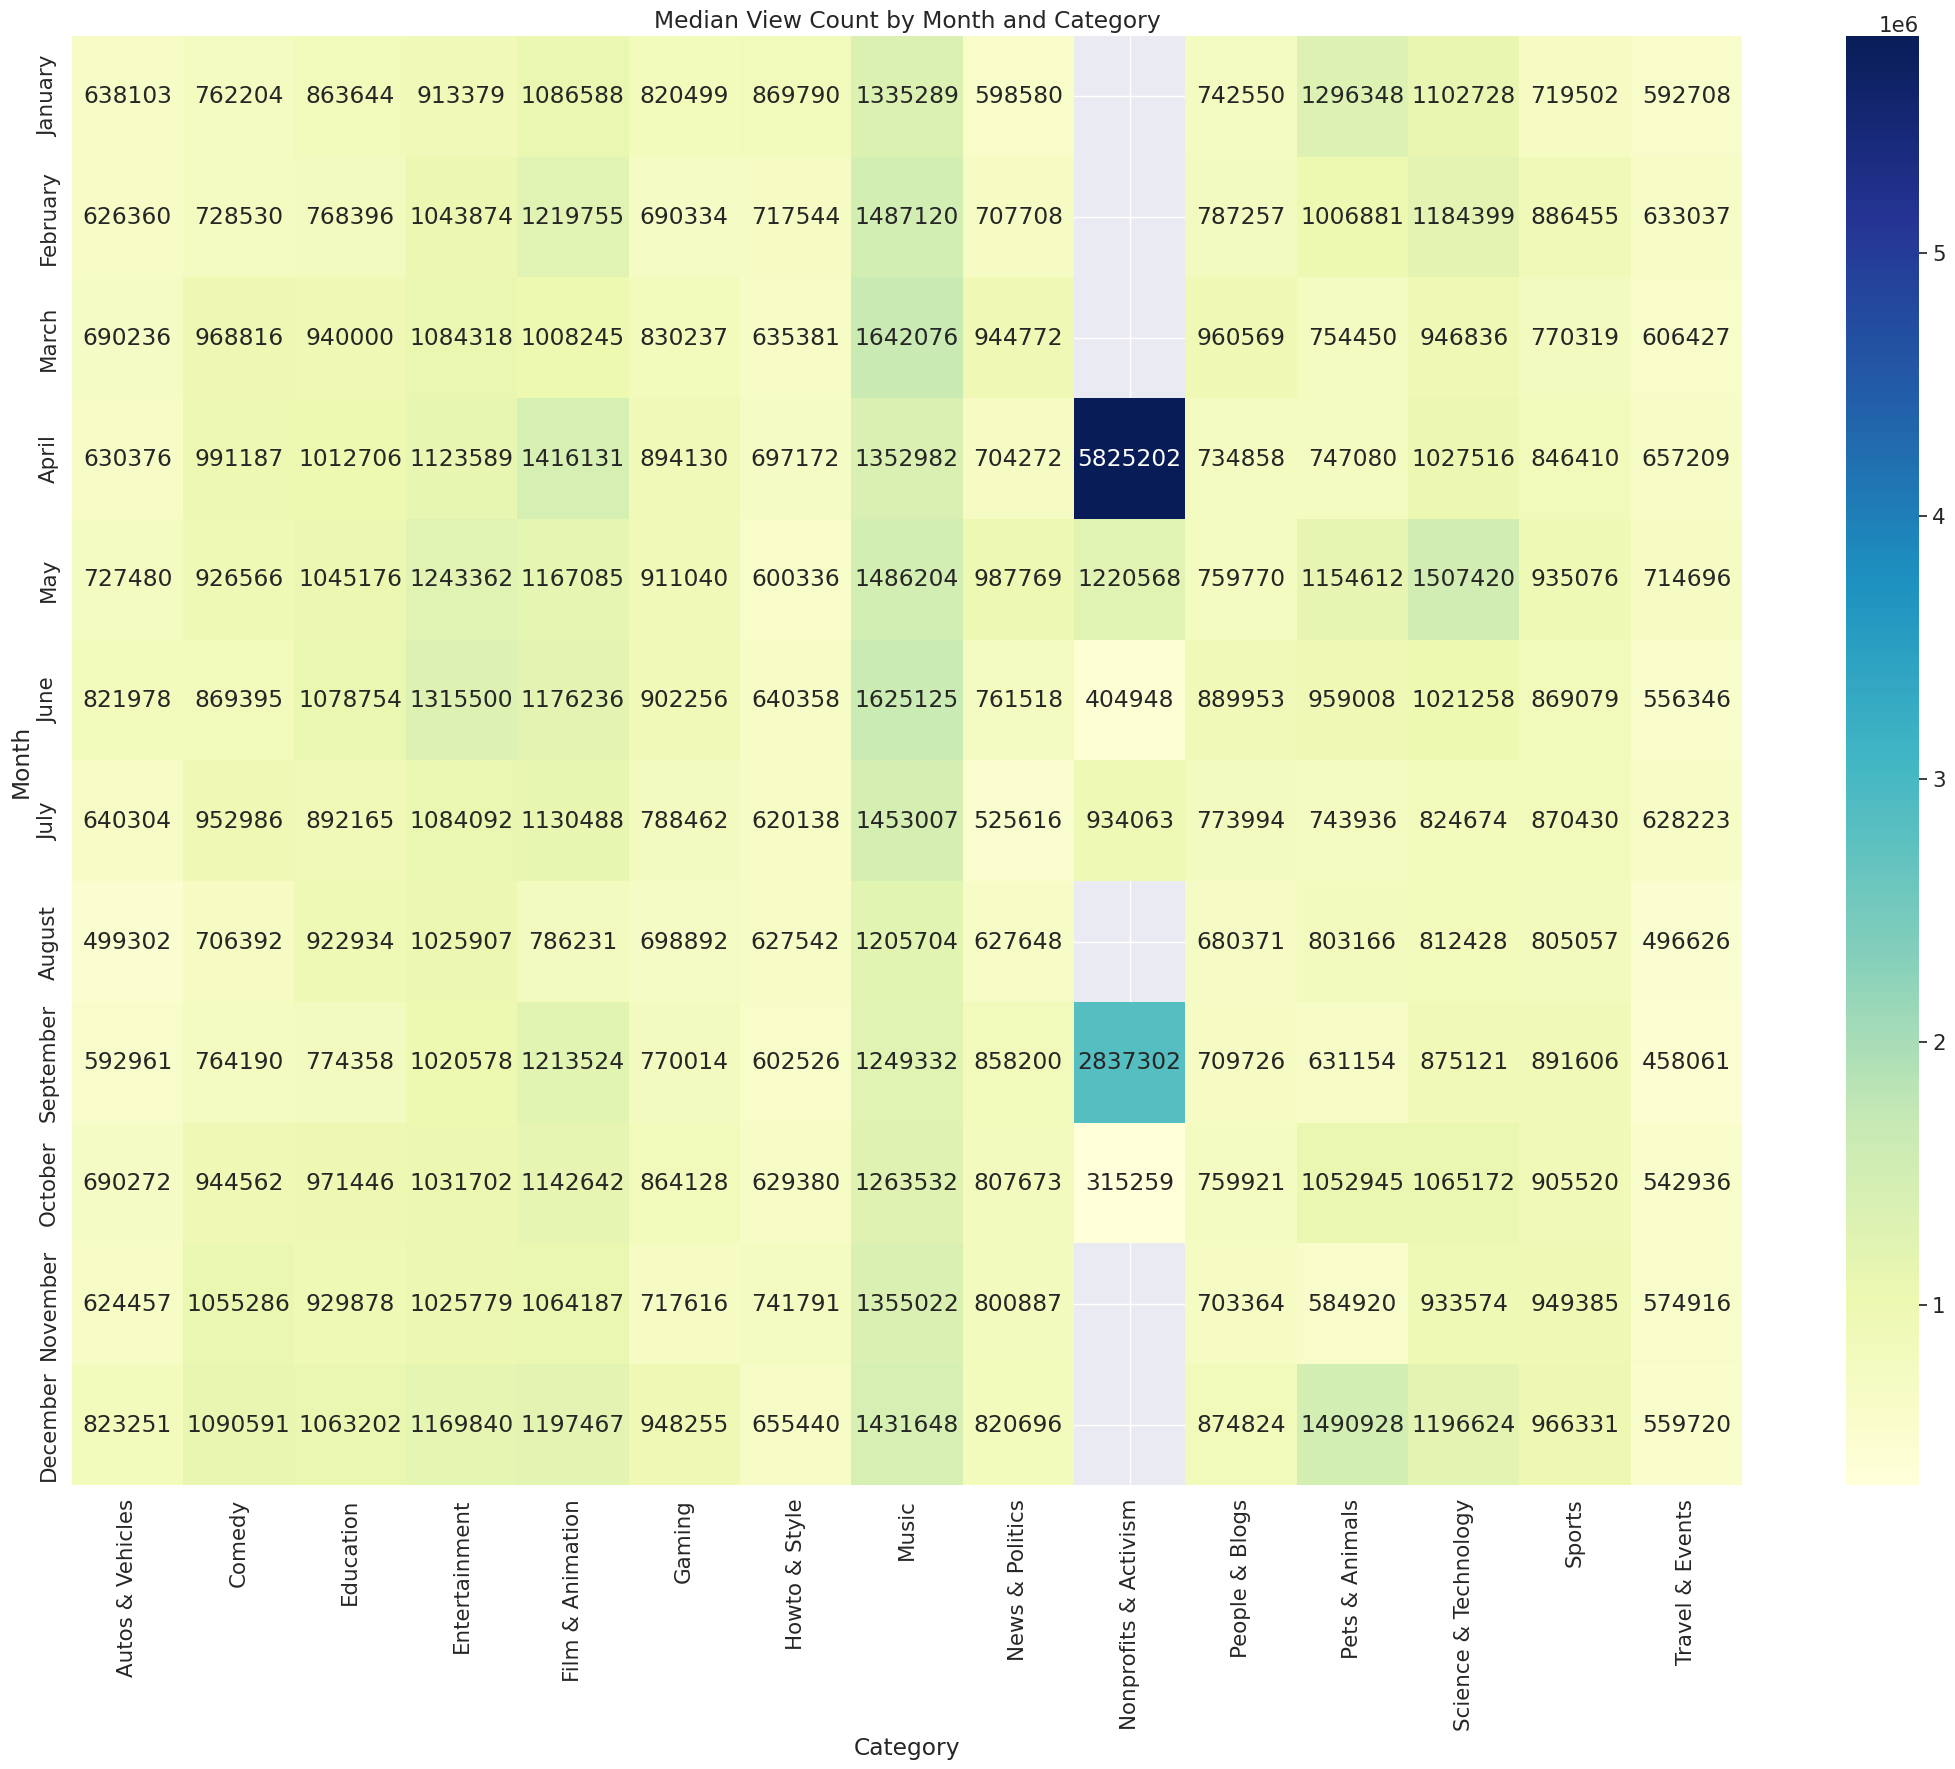

In [ ]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Extract month from 'publishedAt' column
df['month'] = df['publishedAt'].dt.month_name()

# Group data by month and category, and calculate median view count
views_by_month_category = df.groupby(['month', 'categoryId'])['view_count'].median().reset_index()

# Pivot the data for visualization
pivot_views = views_by_month_category.pivot(index="month", columns="categoryId", values="view_count")

# Reorder months for visualization
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
pivot_views = pivot_views.reindex(months_order)

# Plotting
plt.figure(figsize=(22, 18))
sns.heatmap(pivot_views, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title('Median View Count by Month and Category')
plt.xlabel('Category')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

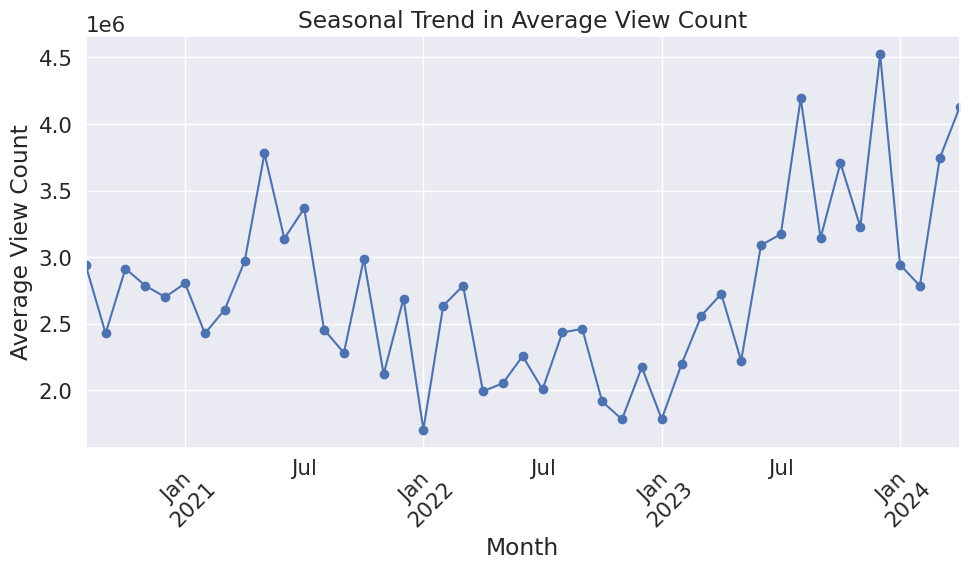

In [ ]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Extract month and year from the 'publishedAt' column
df['month_year'] = df['publishedAt'].dt.to_period('M')

# Group by month and calculate the average view count
monthly_avg_views = df.groupby('month_year')['view_count'].mean()

# Plot the seasonal trend of average view count
plt.figure(figsize=(10, 6))
monthly_avg_views.plot(kind='line', marker='o', color='b')
plt.title('Seasonal Trend in Average View Count')
plt.xlabel('Month')
plt.ylabel('Average View Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

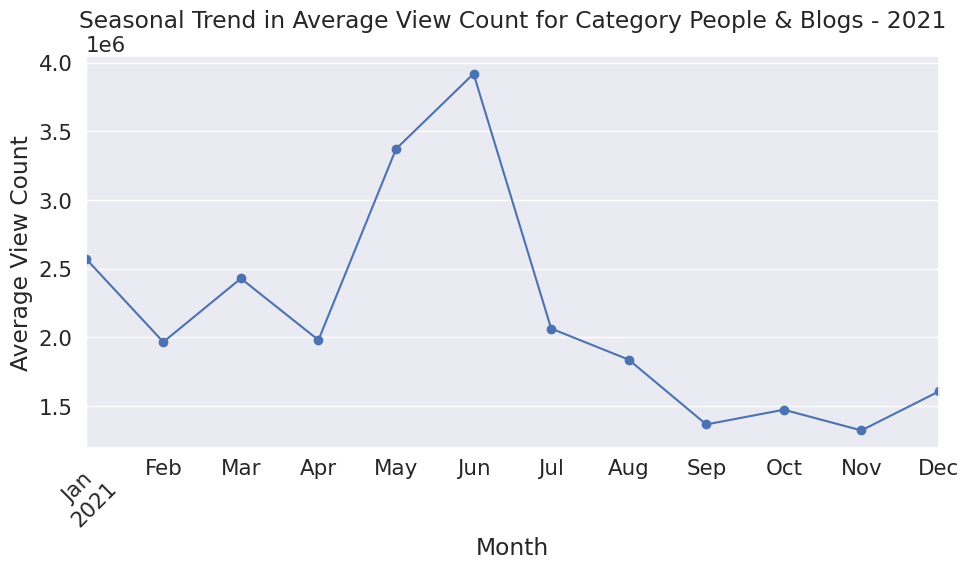

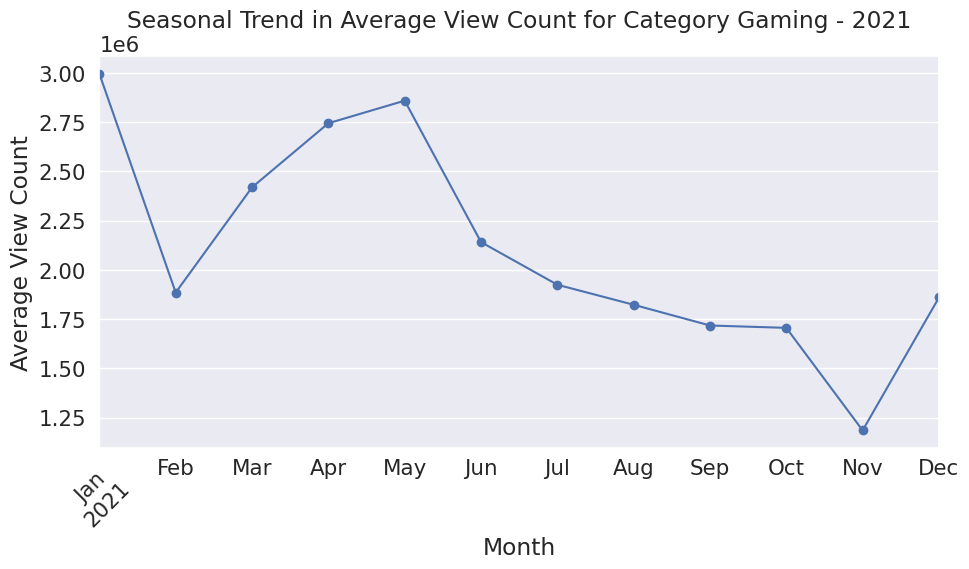

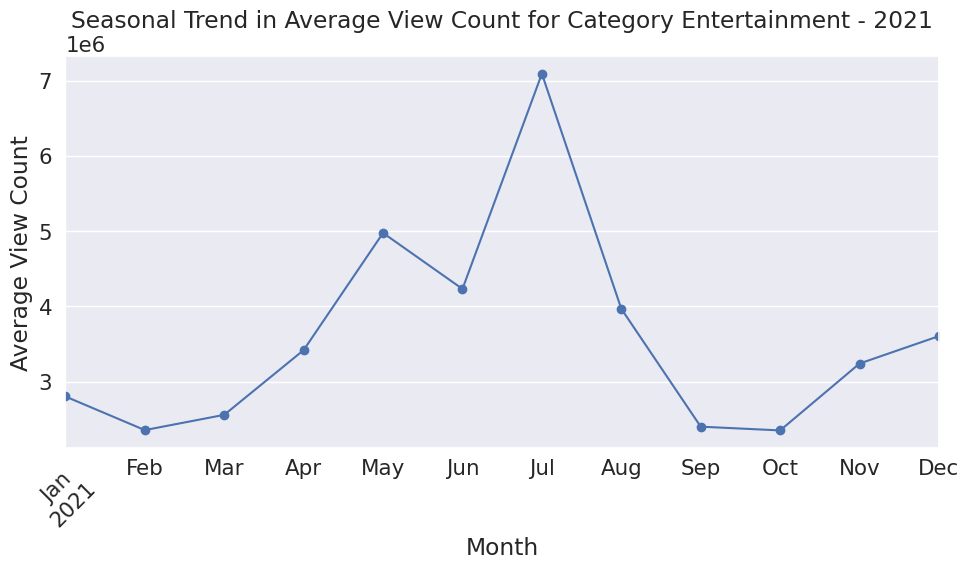

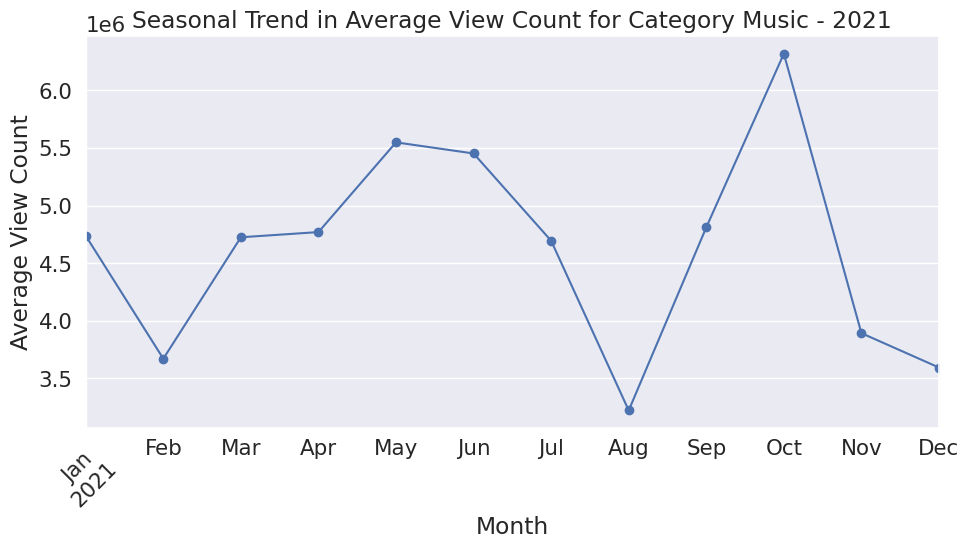

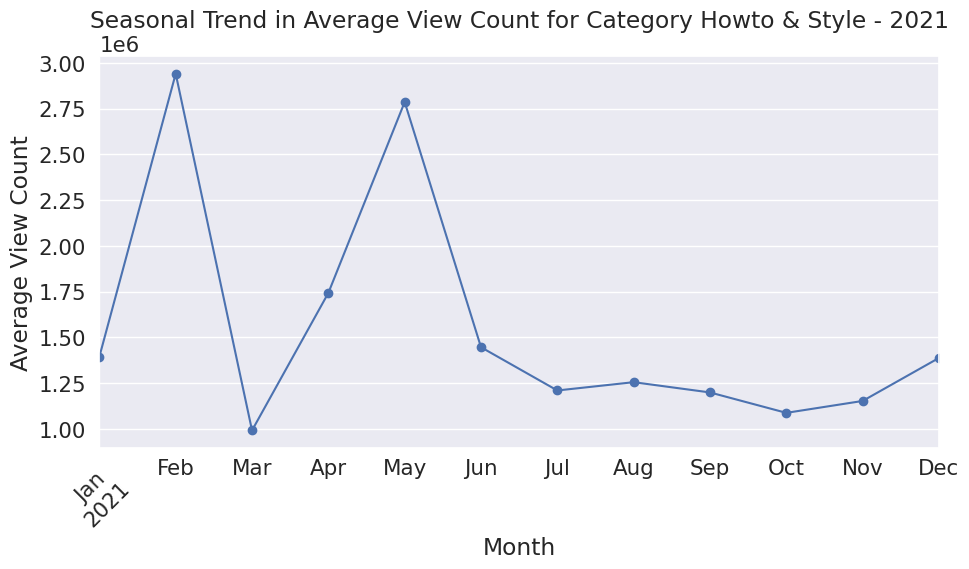

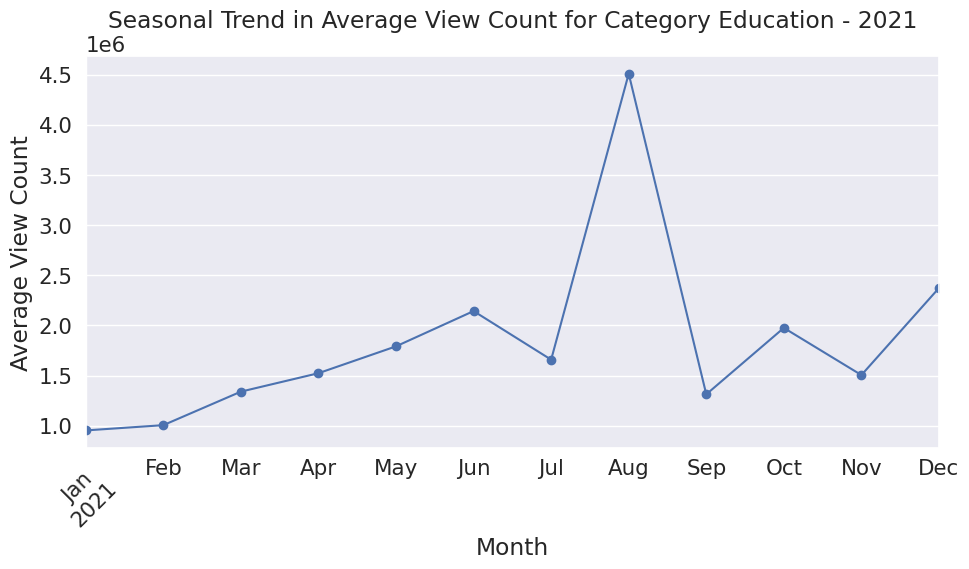

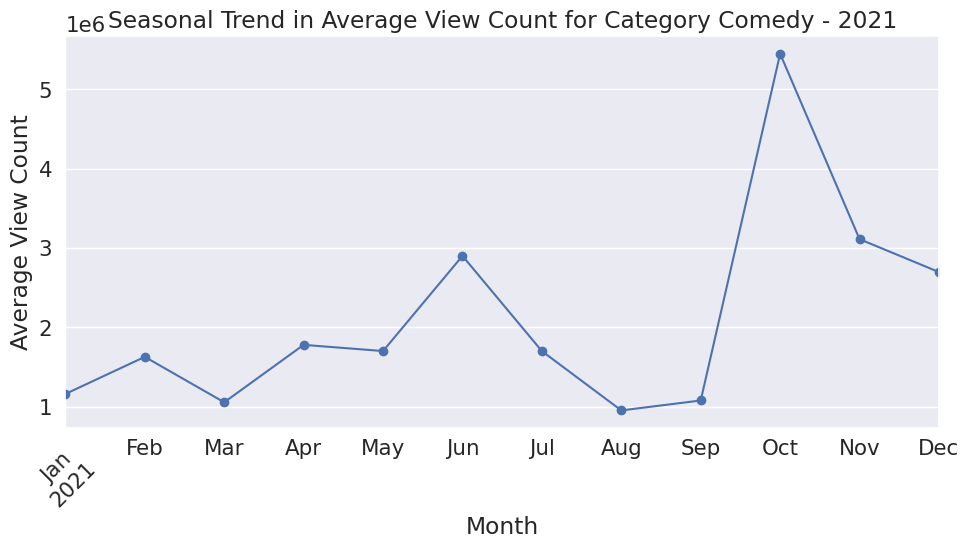

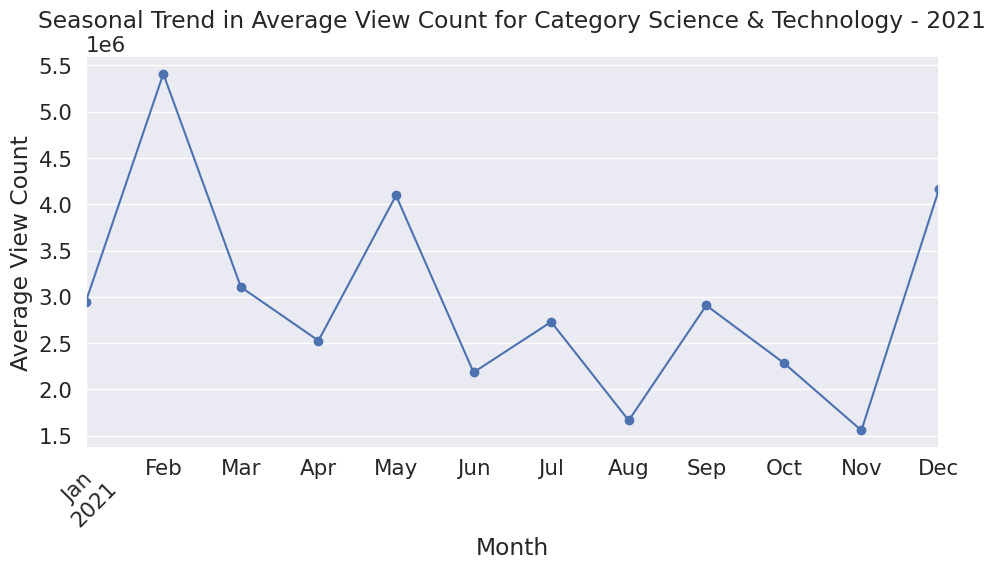

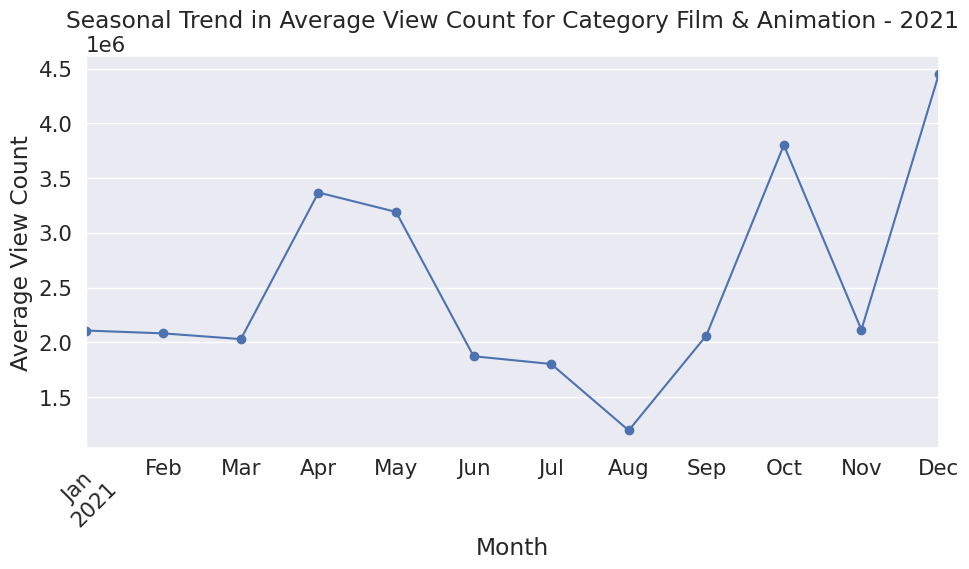

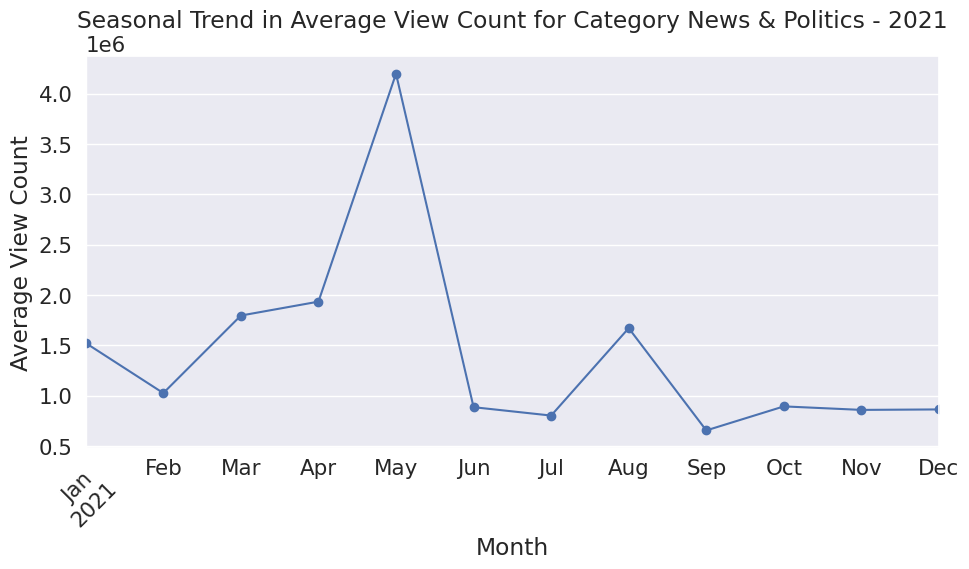

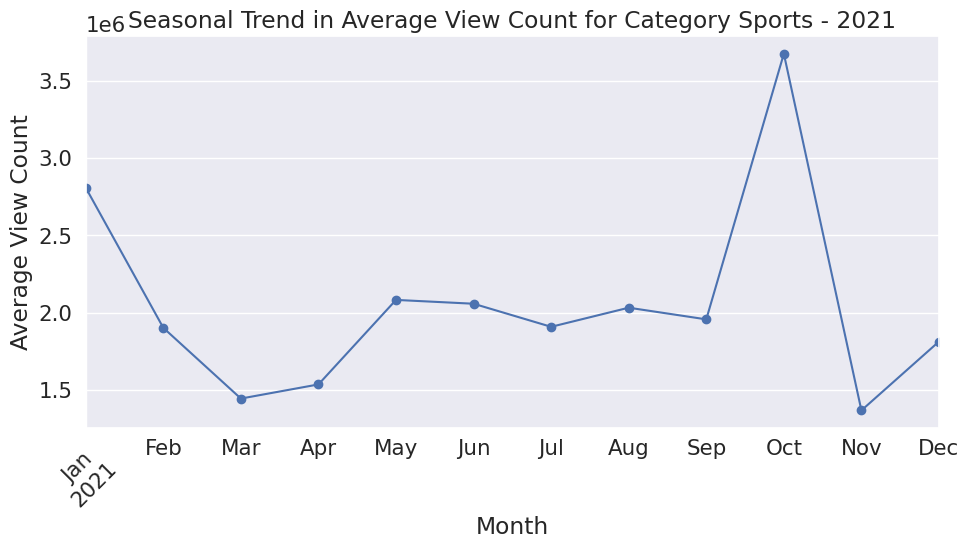

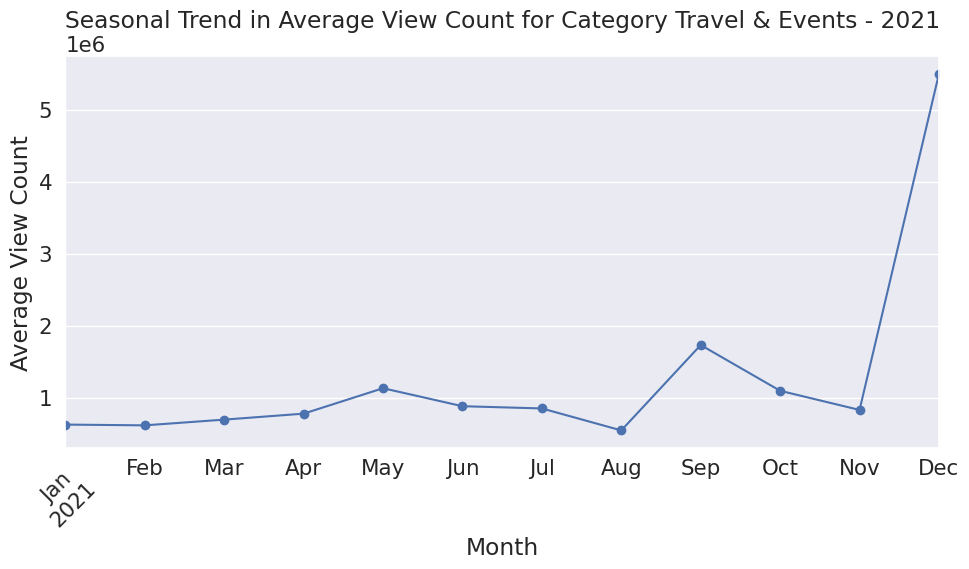

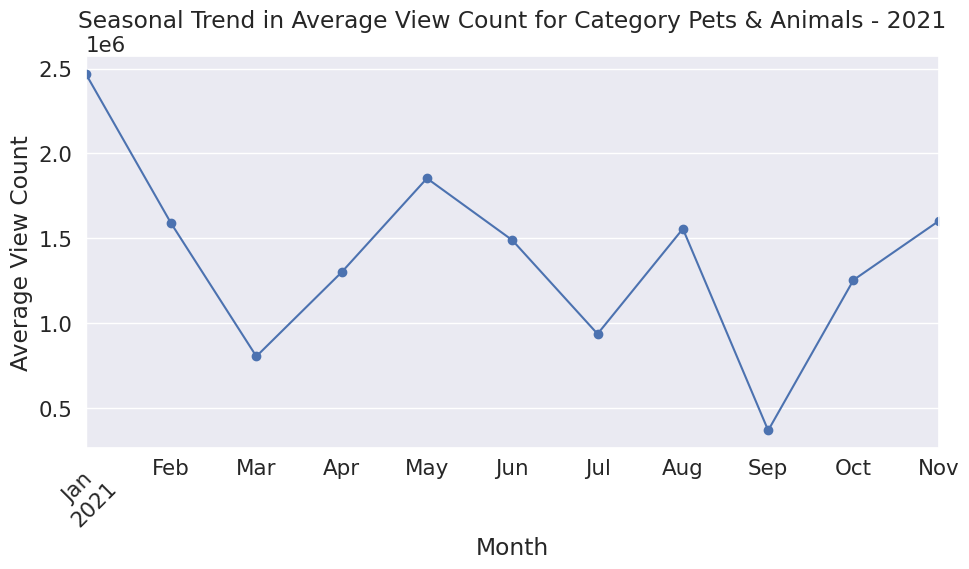

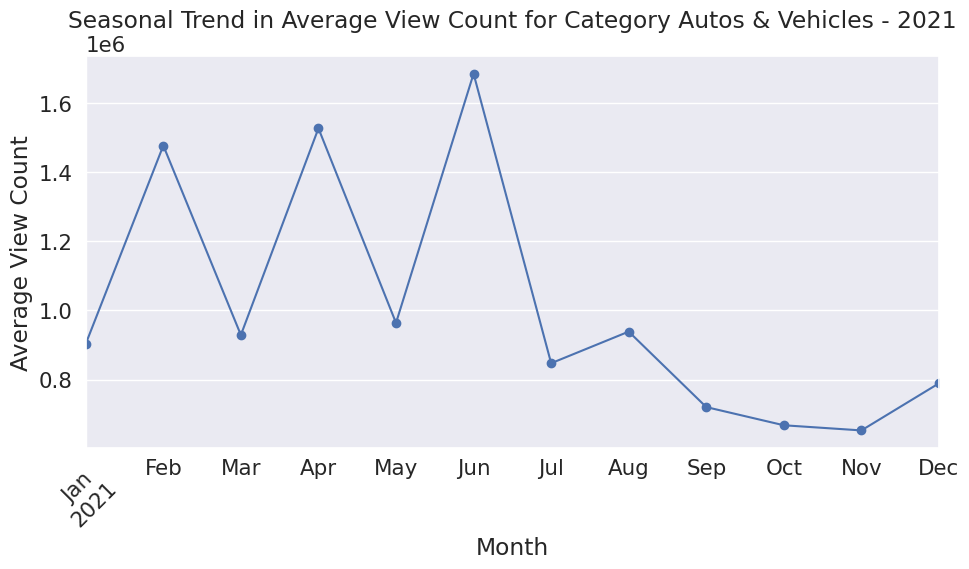

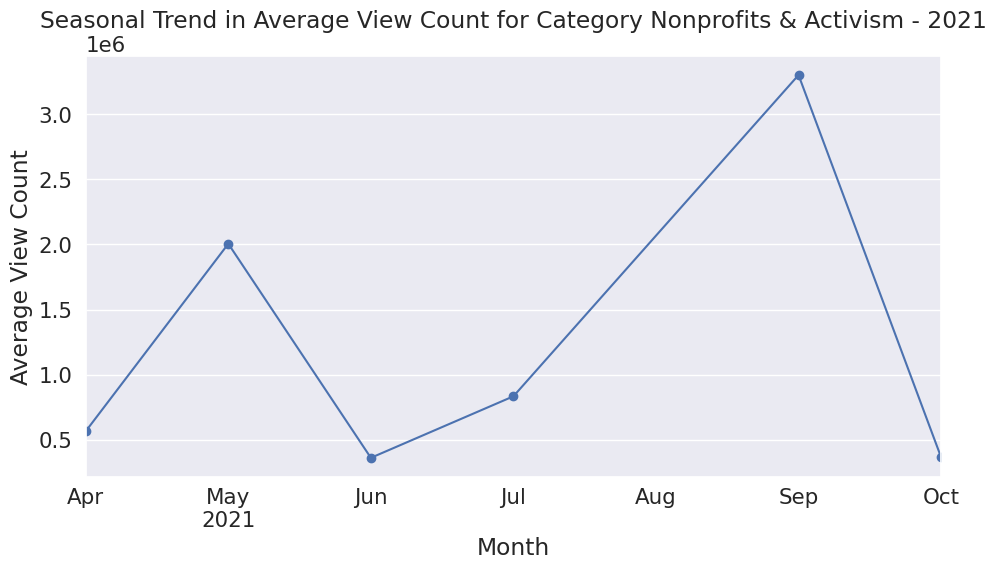

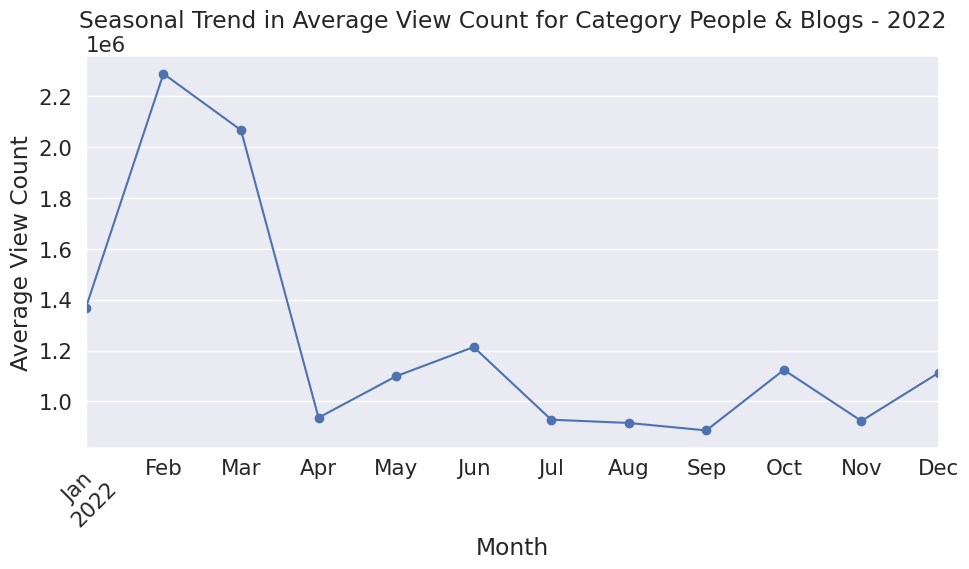

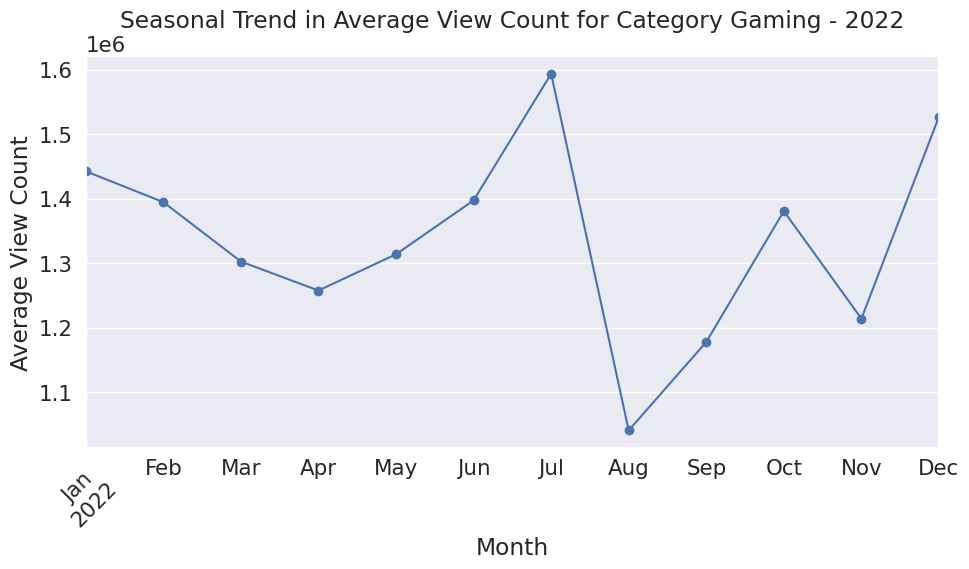

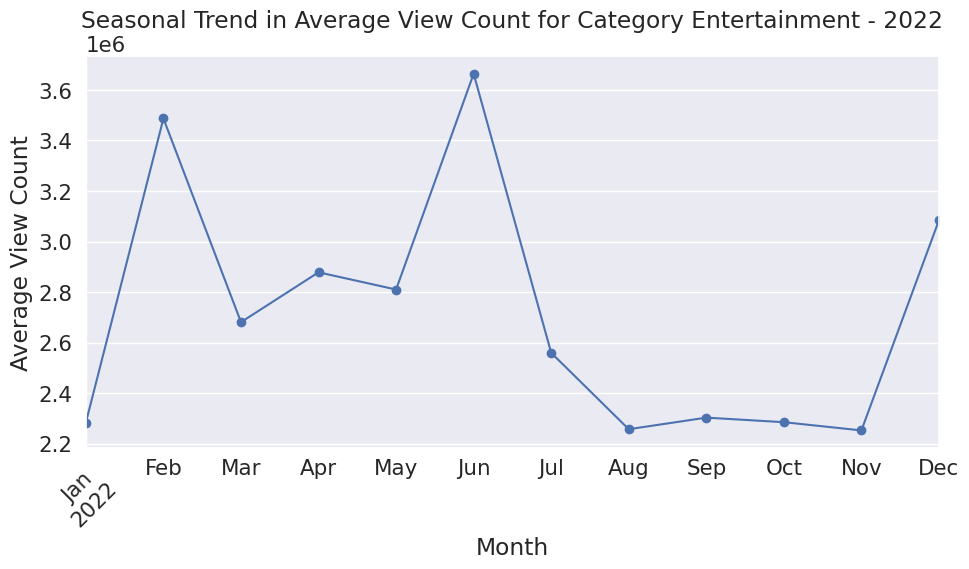

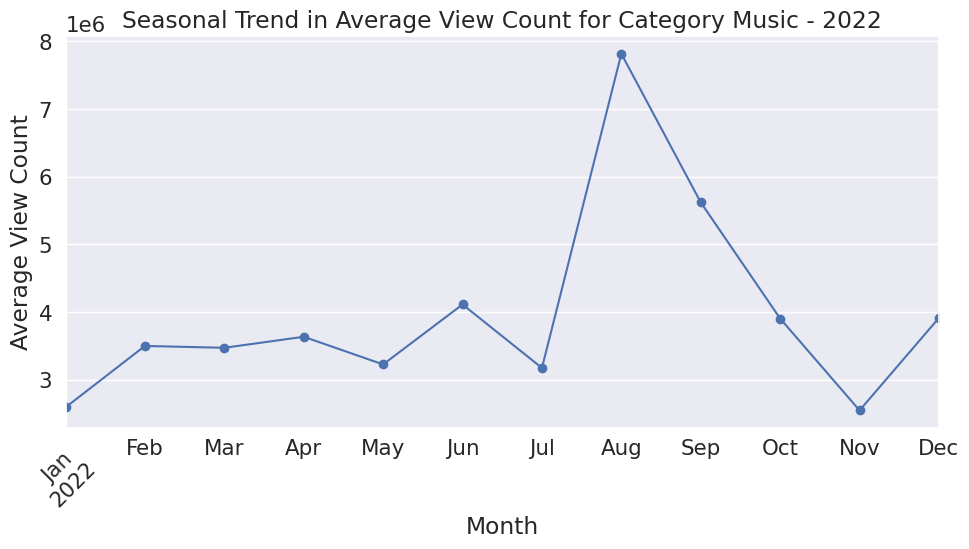

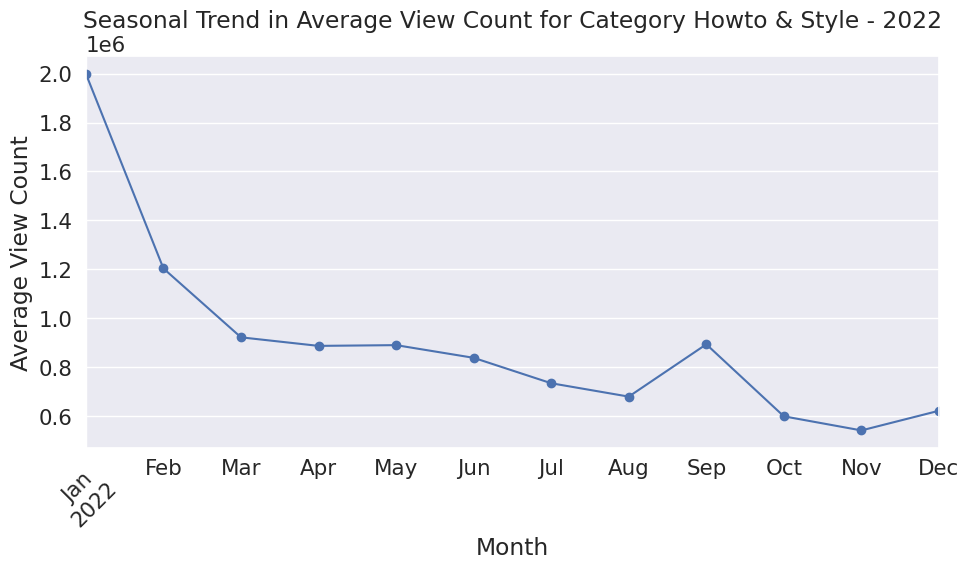

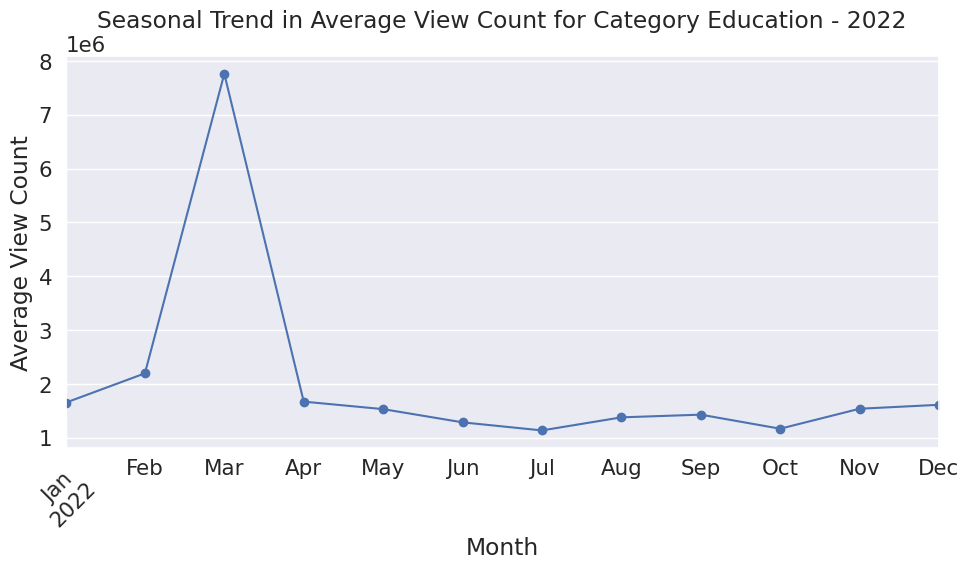

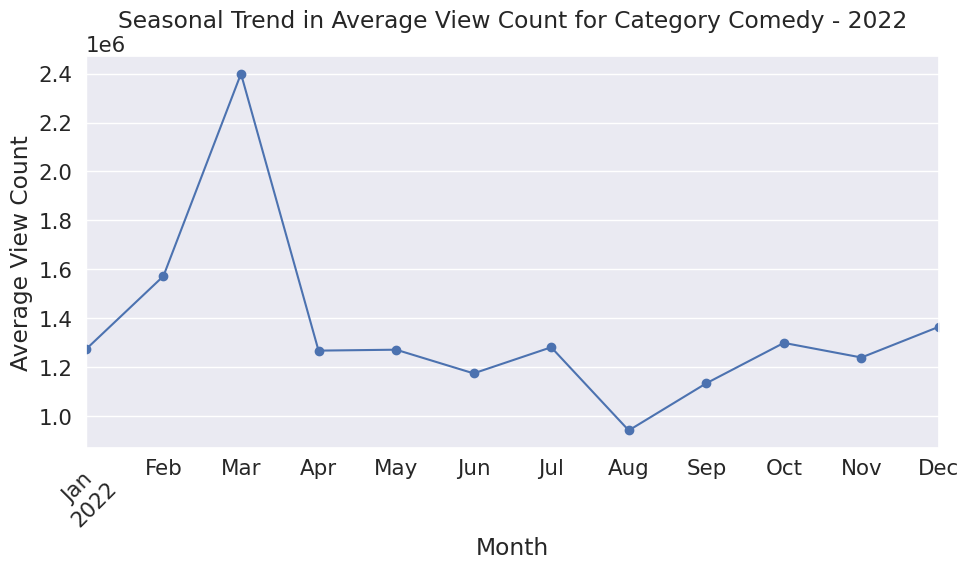

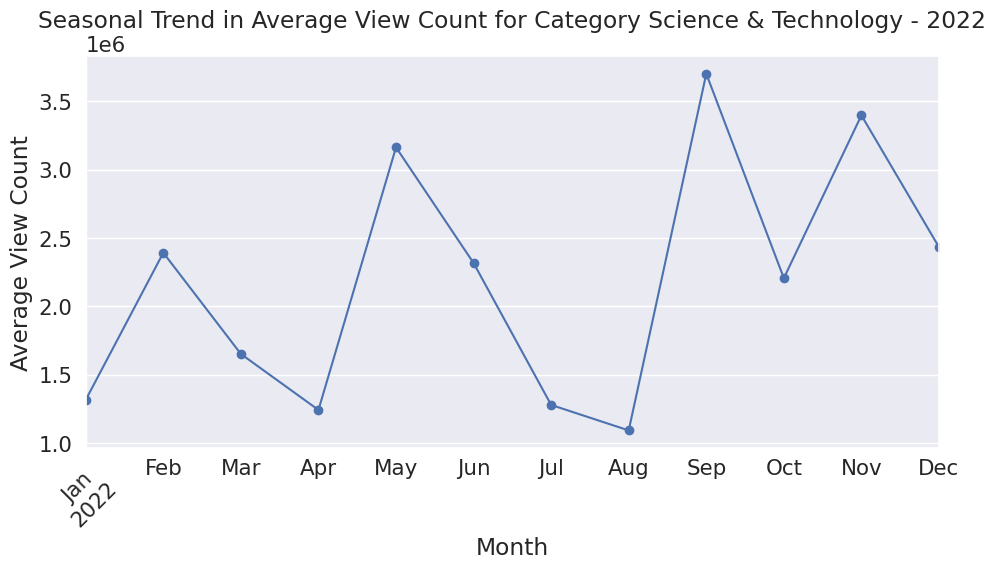

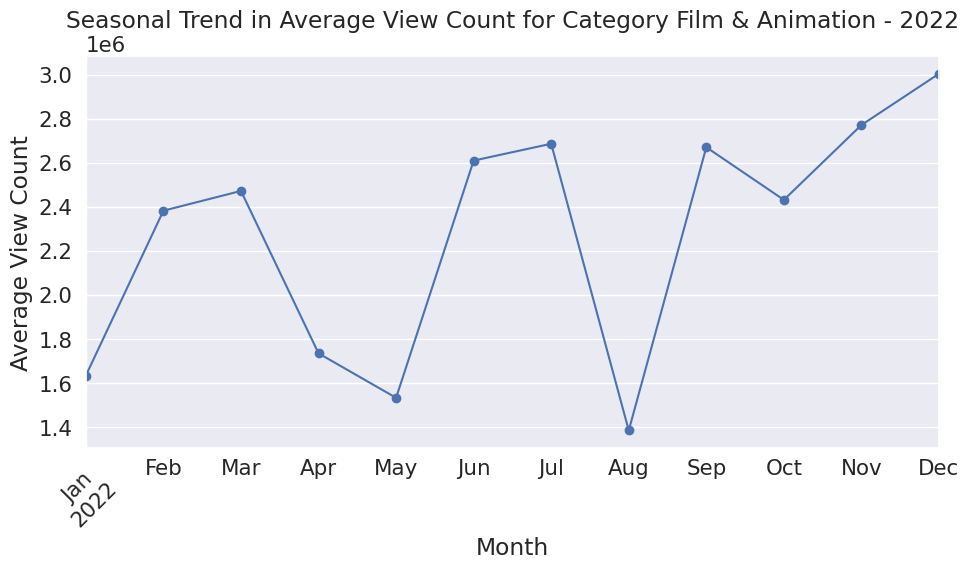

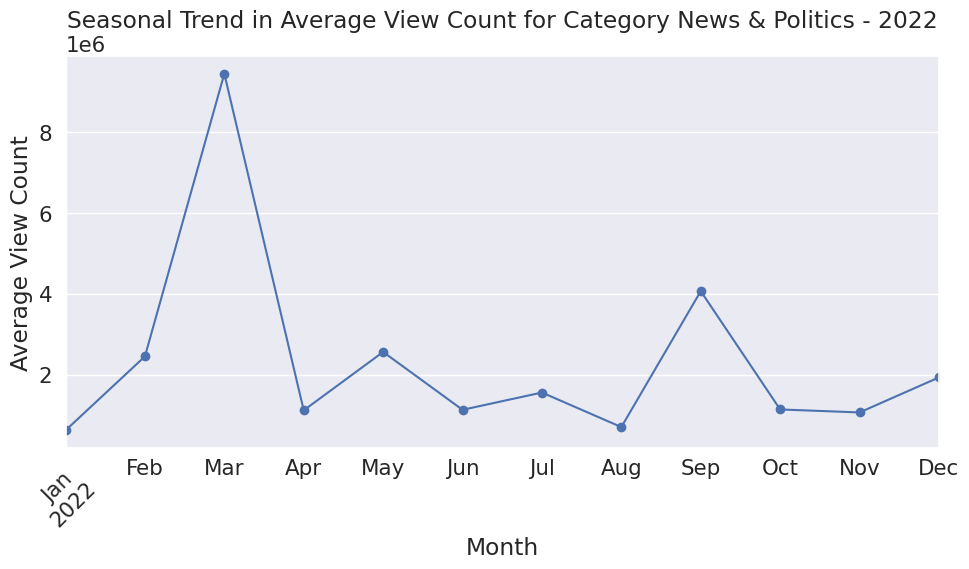

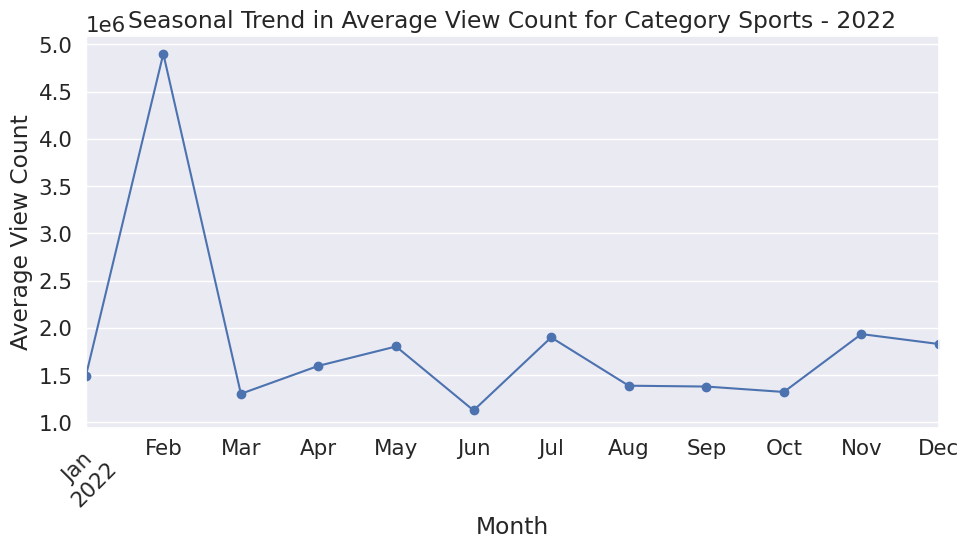

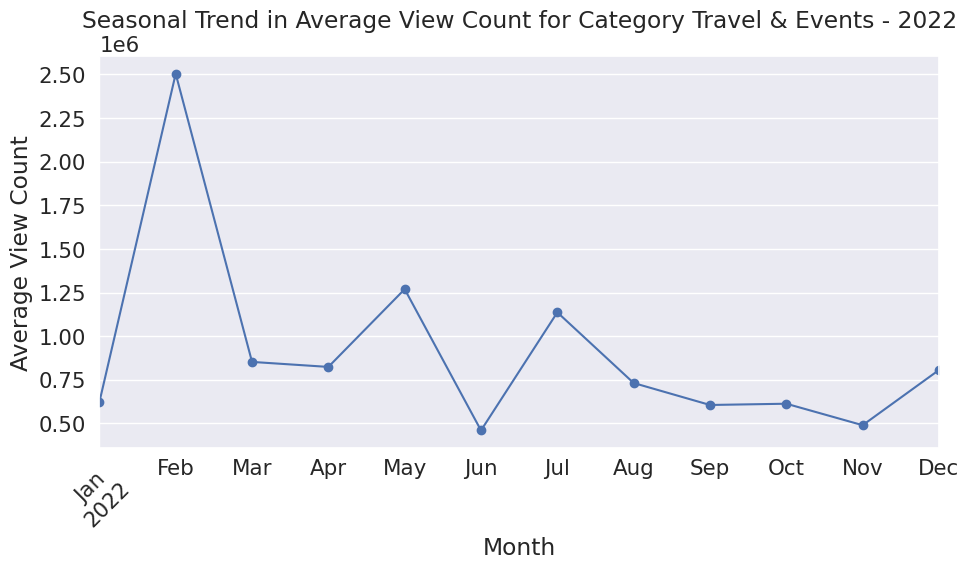

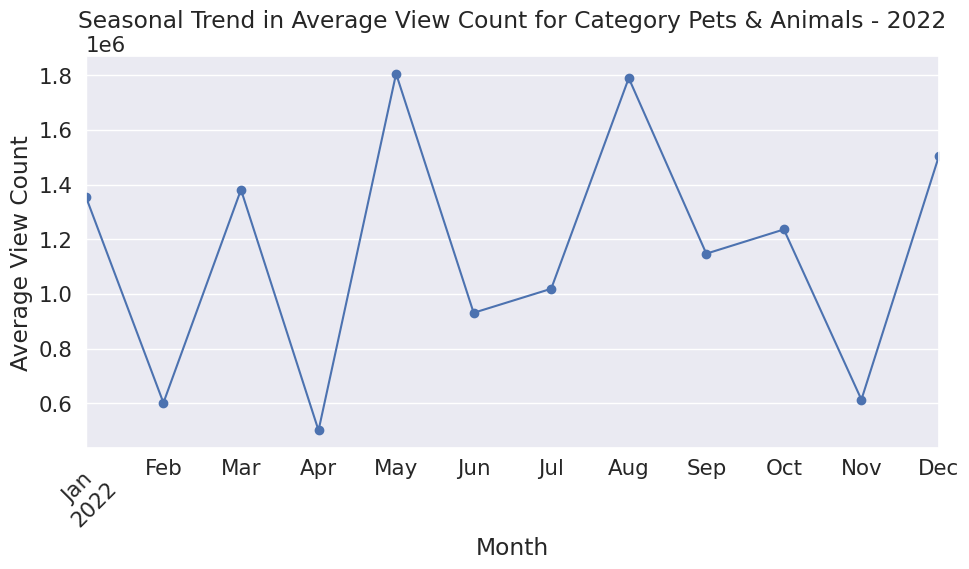

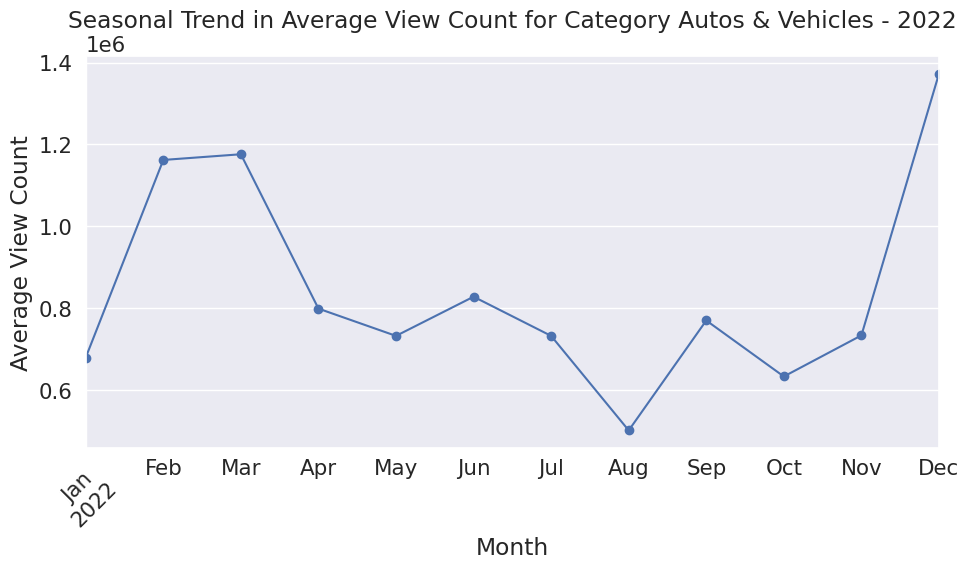

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1401: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.



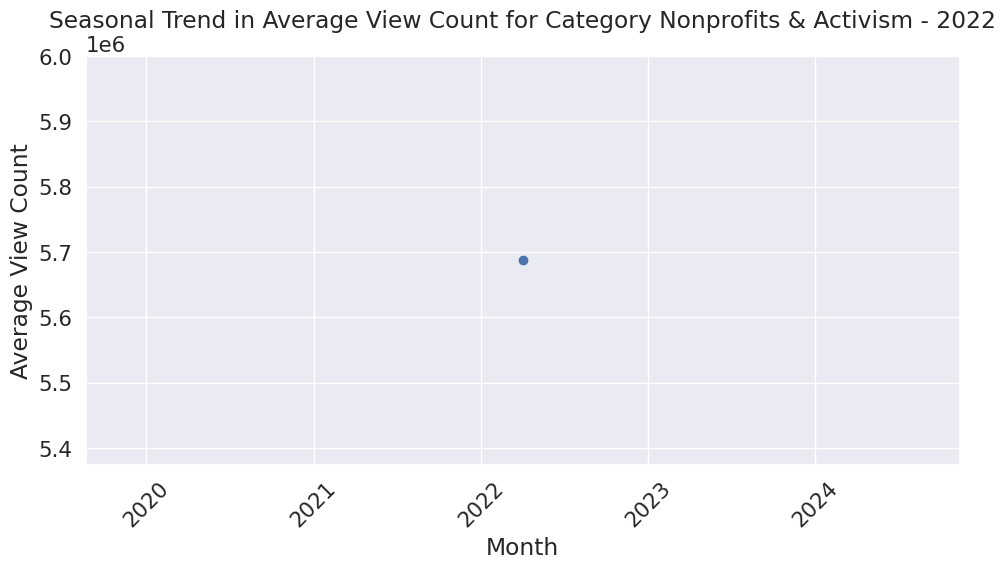

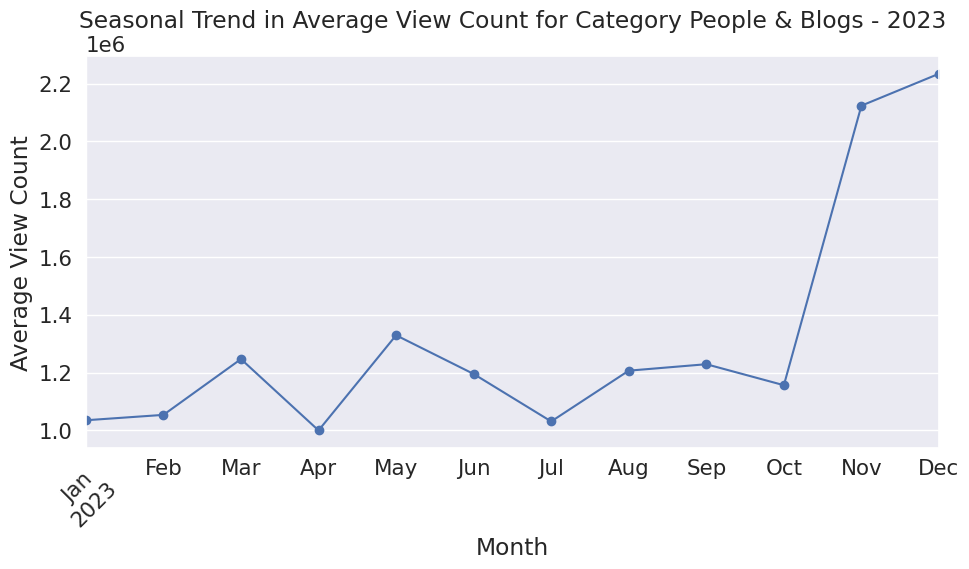

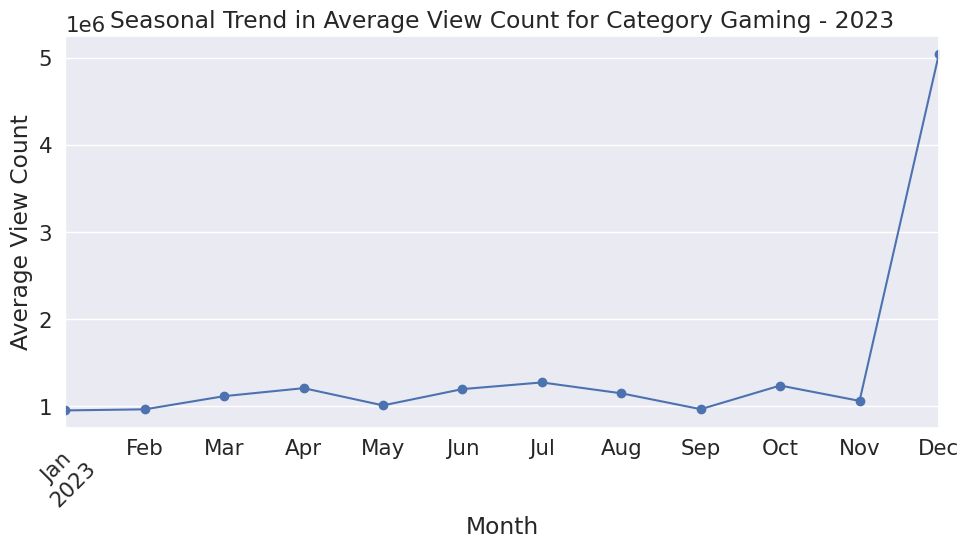

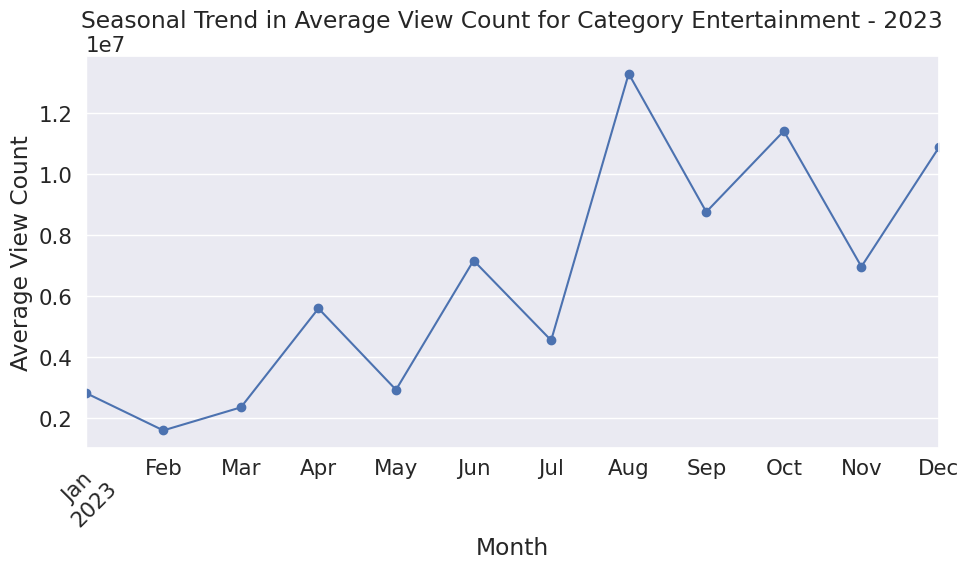

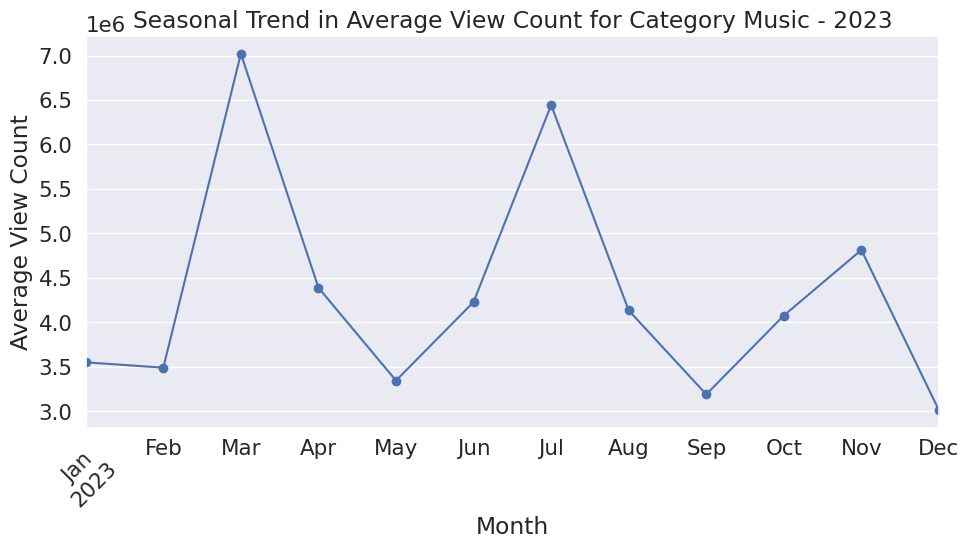

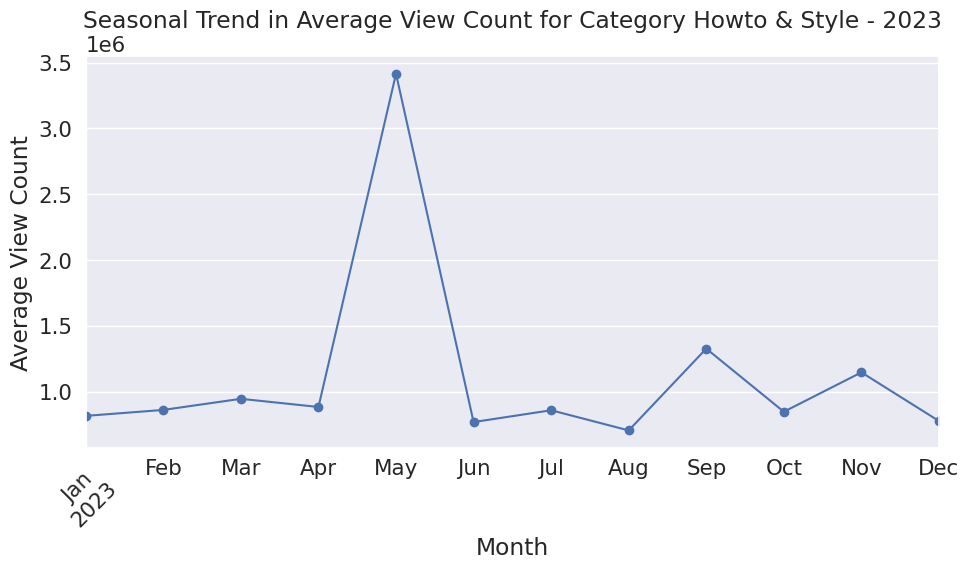

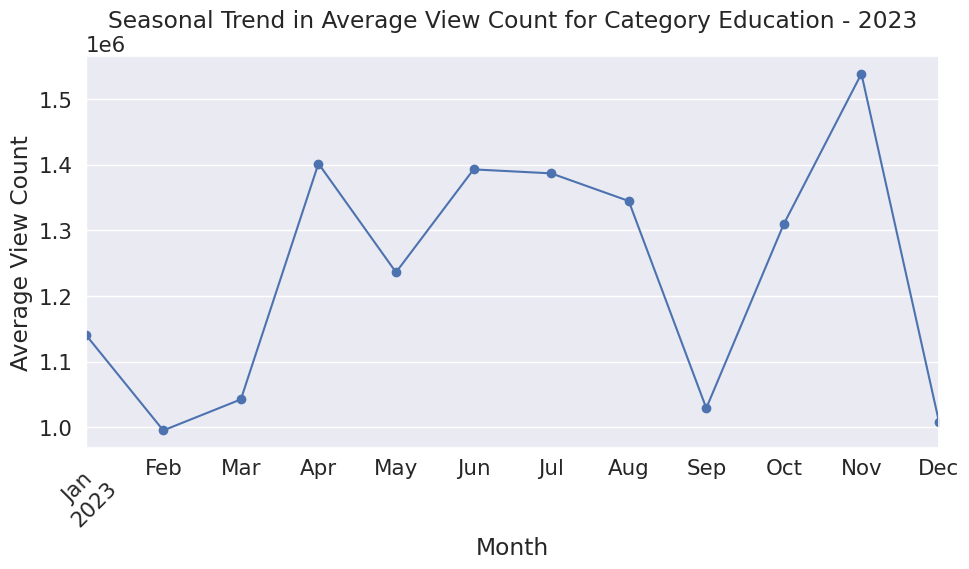

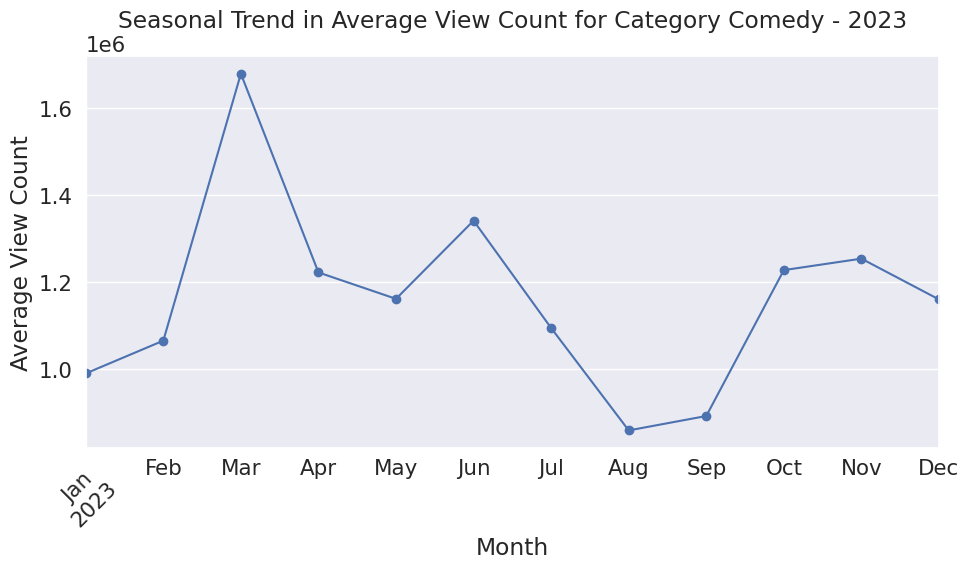

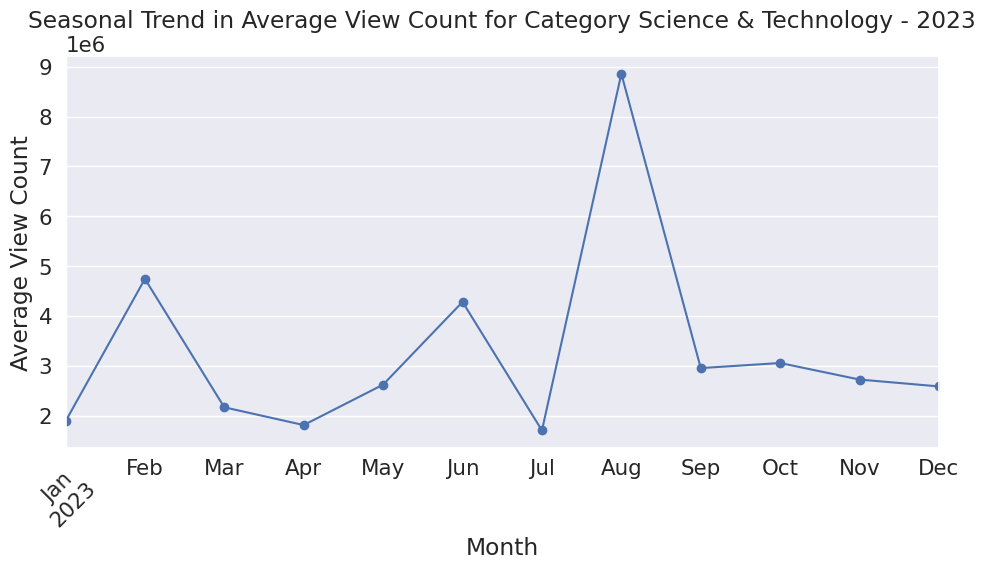

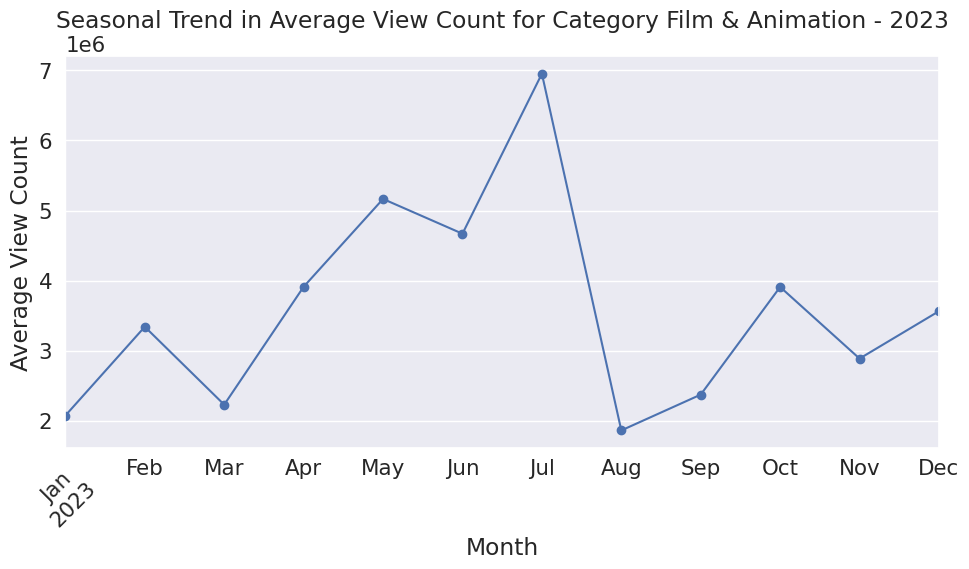

In [ ]:

# Convert the 'publishedAt' column to datetime format
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Extract year from the 'publishedAt' column
df['year'] = df['publishedAt'].dt.year

# Get unique category IDs
unique_category_ids = df['categoryId'].unique()

# Plot seasonal trend for each category for each year
for year in range(2021, 2024):
    for category_id in unique_category_ids:
        # Filter data for the current year and category
        category_year_df = df[(df['categoryId'] == category_id) & (df['year'] == year)]

        # Group by month and calculate the average view count
        monthly_avg_views = category_year_df.groupby(df['publishedAt'].dt.to_period('M'))['view_count'].mean()

        # Plot the seasonal trend of average view count for the current category and year
        plt.figure(figsize=(10, 6))
        monthly_avg_views.plot(kind='line', marker='o', color='b')
        plt.title(f'Seasonal Trend in Average View Count for Category {category_id} - {year}')
        plt.xlabel('Month')
        plt.ylabel('Average View Count')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


In [ ]:
print(df.dtypes)


title                    object
publishedAt              object
channelId                object
channelTitle             object
categoryId               object
trending_date            object
tags                     object
view_count                int64
likes                     int64
dislikes                  int64
comment_count             int64
comments_disabled          bool
ratings_disabled           bool
title_cl                 object
likes_dislikes_ratio    float64
dtype: object


In [ ]:
import pandas as pd

# Assuming your DataFrame is named df
# Convert 'trending_date' and 'publishedAt' to datetime
df["JoinedTrending"] = pd.to_datetime(df['trending_date'])
df["UploadedTime"] = pd.to_datetime(df['publishedAt'])

# Calculate the difference in days between joining trending and upload time
df["DaysTakenToBeOnTrending"] = (df["JoinedTrending"] - df["UploadedTime"]).dt.days

# Replace negative values with 0
df['DaysTakenToBeOnTrending'] = df['DaysTakenToBeOnTrending'].apply(lambda x: 0 if x < 0 else x)

# Display a sample of the DataFrame to verify the changes
print(df[['JoinedTrending', 'UploadedTime', 'DaysTakenToBeOnTrending']].sample(10))


       JoinedTrending UploadedTime  DaysTakenToBeOnTrending
8421       2020-09-23   2020-09-22                        1
59814      2021-06-08   2021-06-06                        2
220875     2023-08-19   2023-08-15                        4
98471      2021-12-13   2021-12-11                        2
82566      2021-09-22   2021-09-16                        6
235842     2023-11-03   2023-10-31                        3
211779     2023-07-04   2023-06-27                        7
155169     2022-09-22   2022-09-16                        6
20149      2020-11-21   2020-11-15                        6
238607     2023-11-17   2023-11-16                        1


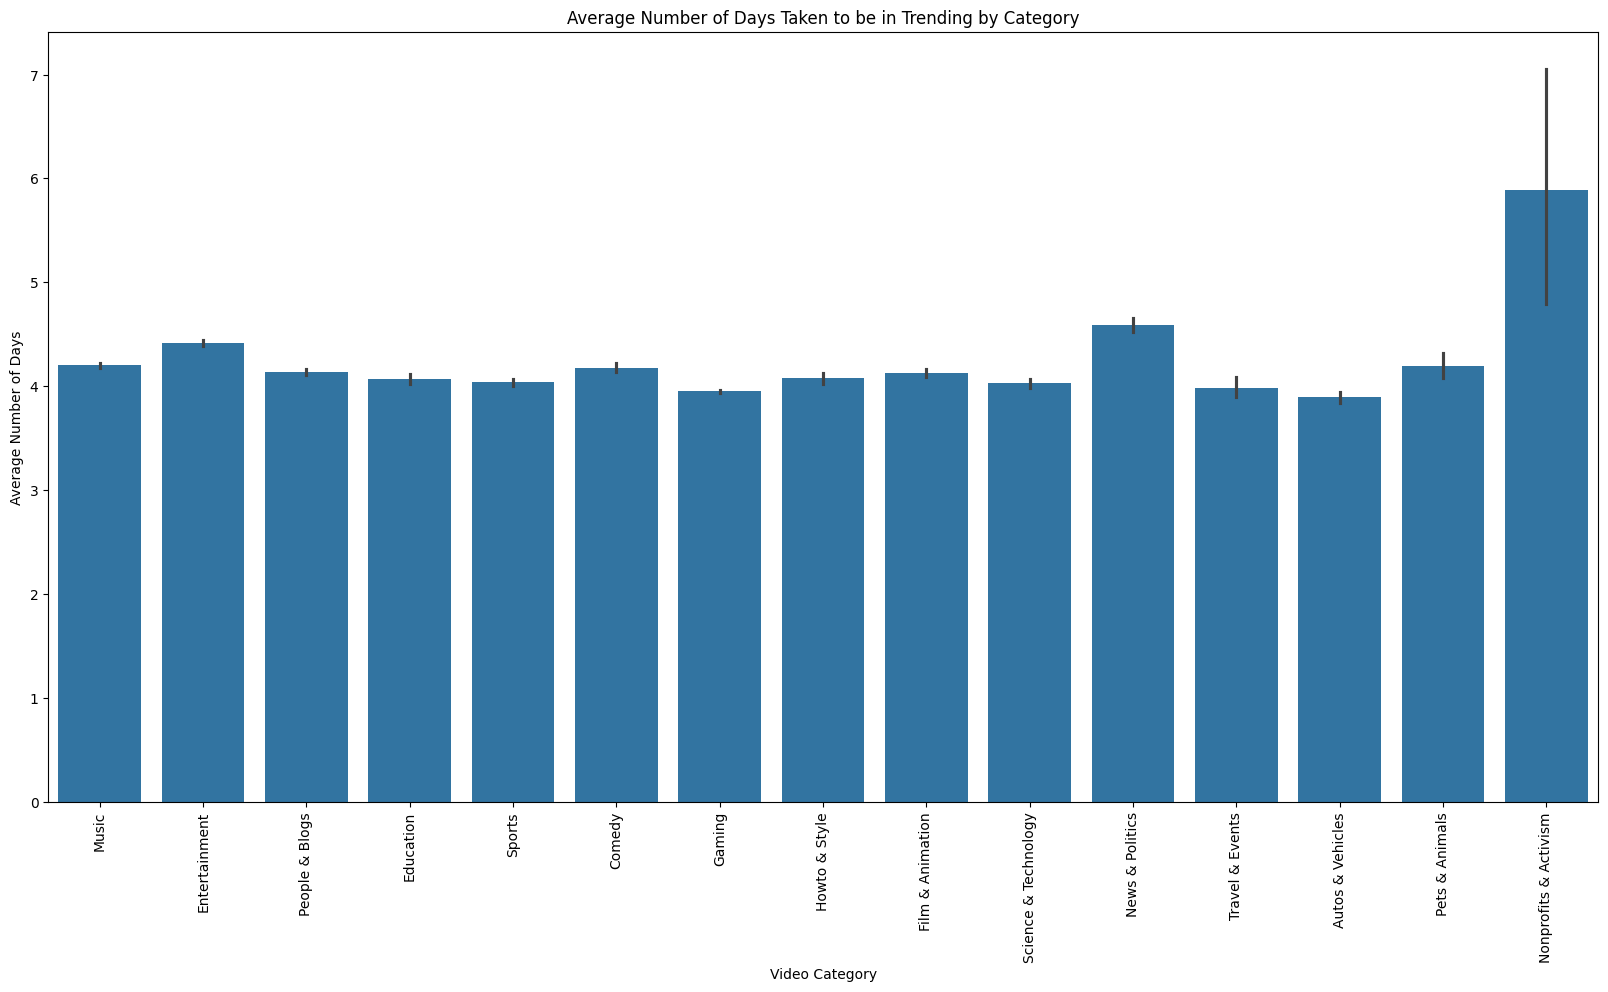

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))

# Plot the barplot
sns.barplot(x='categoryId', y='DaysTakenToBeOnTrending', data=df)

# Add title and labels
plt.title("Average Number of Days Taken to be in Trending by Category")
plt.xlabel("Video Category")
plt.ylabel("Average Number of Days")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show plot
plt.show()

In [ ]:
df['engagement_rate'] = (df['likes'] + df['dislikes'] + df['comment_count']) / df['view_count']
df['like_dislike_ratio'] = df['likes'] / df['dislikes']
df['comment_view_ratio'] = df['comment_count'] / df['view_count']
df['likes_per_comment'] = df['likes'] / df['comment_count']
df['dislikes_per_comment'] = df['dislikes'] / df['comment_count']

# Calculate days since publication
df['publishedAt'] = pd.to_datetime(df['publishedAt'], format='%Y-%m-%d')
df['days_since_publication'] = (pd.to_datetime('today') - df['publishedAt']).dt.days

# Calculate likes per day and comments per day
df['likes_per_day'] = df['likes'] / df['days_since_publication']
df['comments_per_day'] = df['comment_count'] / df['days_since_publication']

# Calculate view velocity
df['view_velocity'] = np.log(df['view_count'] + 1) / (df['days_since_publication'] + 1)

In [ ]:
df['comment_rate'] = df['comment_count'] / df['view_count']
df['dislike_rate'] =  df['dislikes'] / df['view_count']
df['dislike_ratio'] = df['dislikes'] / (df['dislikes'] + df['likes'])

In [ ]:

df= df.replace([np.nan,np.inf,-np.inf],0)

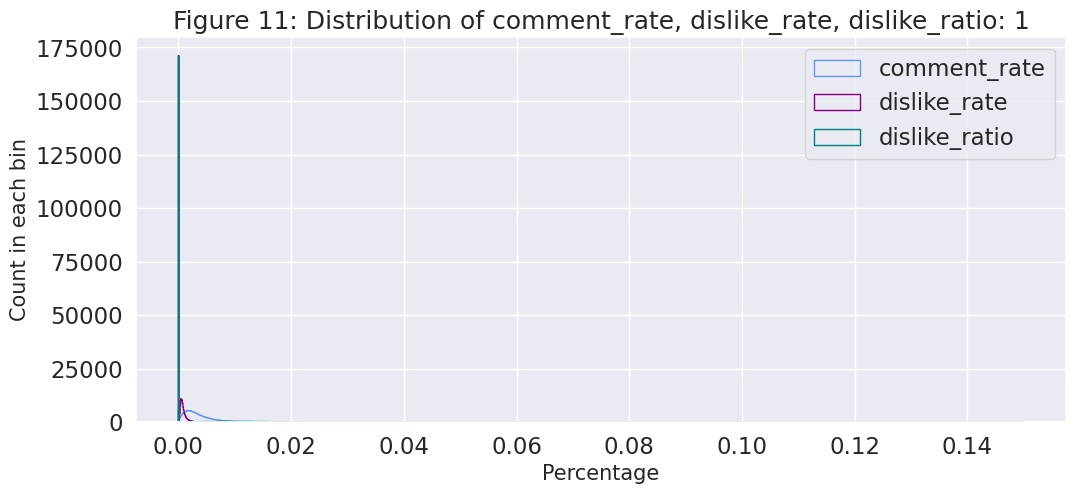

In [ ]:
sns.set(font_scale=1.5)  # Set font scale for all plots

plt.figure(figsize=(12, 5))
plt.hist(df['comment_rate'], label='comment_rate', bins=1500, color='cornflowerblue', histtype='step', range=(0, 0.15))
plt.hist(df['dislike_rate'], label='dislike_rate', bins=1500, color='purple', histtype='step', range=(0, 0.15))
plt.hist(df['dislike_ratio'], label='dislike_ratio', bins=1500, color='teal', histtype='step', range=(0, 0.15))
plt.title("Figure 11: Distribution of comment_rate, dislike_rate, dislike_ratio: 1", fontsize=18)
plt.xlabel("Percentage", fontsize=15)
plt.ylabel("Count in each bin", fontsize=15)
plt.legend()
plt.show()

<ipython-input-24-3fec0c206402>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=l_pcd, y=v_pcd, alpha=0.8, palette="rocket")


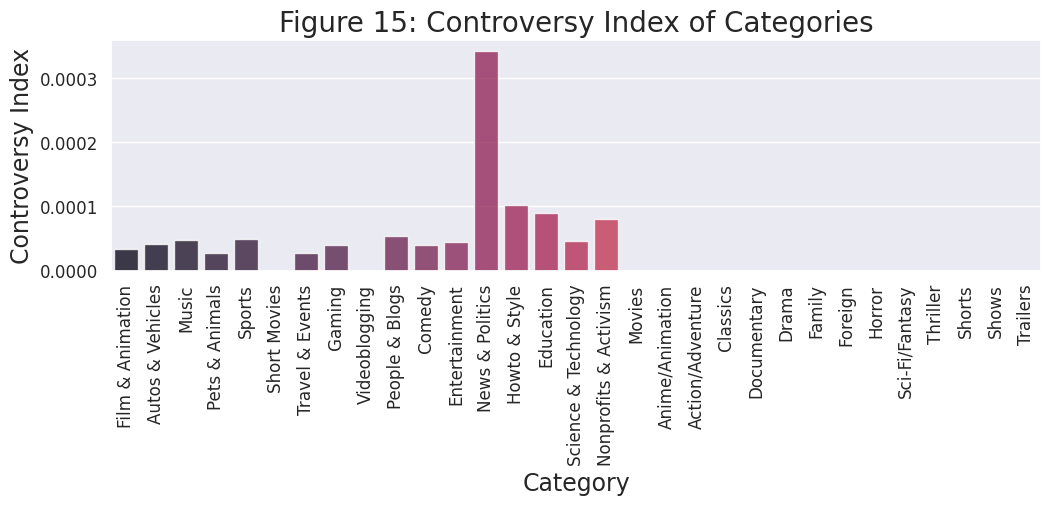

In [ ]:
df['pd_cr_dr'] = df['comment_rate']*df['dislike_ratio']
v_pcd, l_pcd = [],[]

for i,c in ID_to_Category.items():
    l_pcd.append(c)
    pcd = list(df[df['categoryId']== c]['pd_cr_dr'])
    if len(pcd) > 0: v_pcd.append(np.mean(pcd))
    else: v_pcd.append(0)
sns.set_style("darkgrid")
sns.set(font_scale=1.1)

# Bar graph for the controversy index for each category
fig = plt.figure(figsize=(12, 3))
plt.xticks(rotation=90)
sns.barplot(x=l_pcd, y=v_pcd, alpha=0.8, palette="rocket")
plt.xlabel('Category', fontsize=17)
plt.ylabel('Controversy Index', fontsize=17)
plt.title('Figure 15: Controversy Index of Categories', fontsize=20)
plt.show()

Correlation between title sentiment and view count: 0.01004508575682317


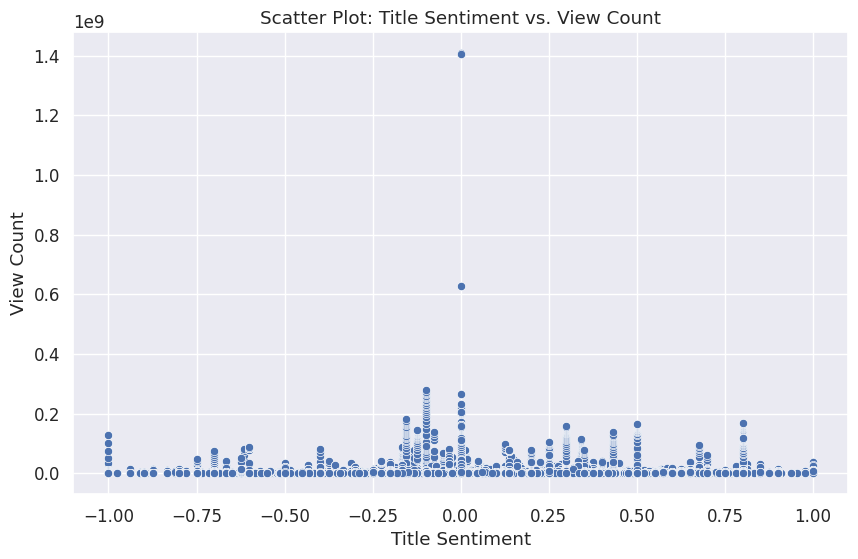

In [ ]:
from textblob import TextBlob
df['title_lower'] = df['title'].str.lower()

# Sentiment Analysis
def get_sentiment(title):
    analysis = TextBlob(title)
    return analysis.sentiment.polarity

# Apply sentiment analysis to titles
df['title_sentiment'] = df['title_lower'].apply(get_sentiment)


# Relationship Analysis
correlation_sentiment_views = df['title_sentiment'].corr(df['view_count'])
print("Correlation between title sentiment and view count:", correlation_sentiment_views)

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='title_sentiment', y='view_count')
plt.title('Scatter Plot: Title Sentiment vs. View Count')
plt.xlabel('Title Sentiment')
plt.ylabel('View Count')
plt.show()

In [ ]:


# Define Trending Criteria (e.g., if views exceed a certain threshold within 1 week)
threshold_views = 1000000  # Example threshold for views
timeframe_days = 7  # Example timeframe for trending determination (in days)

# Calculate Trending Status
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['trending_date'] = pd.to_datetime(df['trending_date'])
df['time_to_trend'] = (df['trending_date'] - df['publishedAt']).dt.days
df['trended'] = (df['view_count'] >= threshold_views) & (df['time_to_trend'] <= timeframe_days)

# Drop unnecessary columns
df.drop(['publishedAt', 'trending_date', 'time_to_trend'], axis=1, inplace=True)

# Create a new DataFrame with the target variable
new_df = df.copy()

# Print the first few rows of the new DataFrame
print(new_df.head())


                                               title  \
0                 I ASKED HER TO BE MY GIRLFRIEND...   
1  Apex Legends | Stories from the Outlands – “Th...   
2  I left youtube for a month and THIS is what ha...   
3  XXL 2020 Freshman Class Revealed - Official An...   
4  Ultimate DIY Home Movie Theater for The LaBran...   

                  channelId   channelTitle      categoryId  \
0  UCvtRTOMP2TqYqu51xNrqAzg       Brawadis  People & Blogs   
1  UC0ZV6M2THA81QT9hrVWJG3A   Apex Legends          Gaming   
2  UCYzPXprvl5Y-Sf0g4vX-m6g  jacksepticeye   Entertainment   
3  UCbg_UMjlHJg_19SZckaKajg            XXL           Music   
4  UCDVPcEbVLQgLZX0Rt6jo34A       Mr. Kate   Howto & Style   

                                                tags  view_count   likes  \
0  brawadis|prank|basketball|skits|ghost|funny vi...     1514614  156908   
1  Apex Legends|Apex Legends characters|new Apex ...     2381688  146739   
2  jacksepticeye|funny|funny meme|memes|jacksepti...     20388

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
X = new_df[['view_count', 'likes', 'dislikes', 'comment_count']]
y = new_df['trended']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.4380929350050225
Classification Report:
              precision    recall  f1-score   support

       False       0.52      0.08      0.13     30408
        True       0.43      0.91      0.58     23350

    accuracy                           0.44     53758
   macro avg       0.48      0.49      0.36     53758
weighted avg       0.48      0.44      0.33     53758



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = new_df[['view_count', 'likes', 'dislikes', 'comment_count']]
y = new_df['trended']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9674281037240969
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.95      0.97     30408
        True       0.93      0.99      0.96     23350

    accuracy                           0.97     53758
   macro avg       0.97      0.97      0.97     53758
weighted avg       0.97      0.97      0.97     53758

